## Project: Prediction of Domestic ISO/IEC 17025 Laboratory Growth by Supervised Learning Regression

### 🟥 **PROJECT**
    
**Project Overview and Problem Type**

  This project is a supervised learning regression analysis problem, utilizing the current status of ISO/IEC 17025 accredited testing laboratories in South Korea to perform **time series forecasting**.

  Problem Type:
  - Learning method: Supervised Learning
  - Task type: Regression Analysis
  - Specific task: Time Series Forecasting

  **Project Goals and Importance**

  Goals:
  - Develop a regression model to predict the growth rate of domestic ISO/IEC 17025 accredited testing laboratories
  - Build an effective prediction system through time series analysis
  - Provide a data-driven decision-making tool for policy development in the conformity assessment industry

  Importance:
  - Policy value: Supports efficient allocation of policy resources by forecasting the growth of testing and certification bodies
  - Industrial value: Enables strategic planning by predicting future trends in the conformity assessment market
  - Academic value: Serves as a practical machine learning solution using real government data

### 🟥 **DATA**

To secure data for this project, data was obtained from a government public institution. Since it was not possible to receive the required data directly, I developed additional web scraping programs (building on those used in the deep learning class) and a PDF downloader to collect individual ISO/IEC 17025 accredited laboratory certificates using STREAMLIT.(These code was omitted in here.too long!) The main reason for collecting these certificates was to obtain the initial accreditation date for each organization. Dynamic web scraping techniques were required, and to avoid impacting government services, scraping intervals were kept as long as possible. The government agency website is https://www.knab.go.kr/.

A total of about 811 PDF certificates were collected, each containing both image and text data, with the required issue date information embedded in the PDF image. The key information extracted from these certificates was <i>**'Issue_Date and Initial_Accreditation_Date'**</i>, which was then merged with previously collected data (from the deep learning course). This process resulted in the construction of the final dataset.

However, for time series modeling, the original dataset of over 41,000 rows was aggregated into annual and monthly summary tables, reducing the modeling dataset to 30 rows (annual) and 389 rows (monthly) despite spanning 30 years.

⭕️ **Summary**
  Total: 41,186 rows, 17 columns → Aggregated for modeling as 30 annual rows and 389 monthly rows.

⭕️ **Key features**
  - Issue_Date
  - Initial_Accreditation_Date, 

  <figure>
    <img src="./issueDateExtract.png" width="350" style="border: 2px solid #3a2dc8ff; 
      border-radius: 8px; padding: 5px; background: white; box-shadow: 0 2px 4px 
      rgba(0,0,0,0.1)">
    <figcaption style="text-align: left; font-style: italic; color: #666; margin-top: 5px">
      Fig 1. Key features(Issue Date/Initial Accreditation Date) Extraction Area in a Accredited PDF
    </figcaption>
  </figure>

- **All features type**
  -  AccredNo                 object
  -  OrgName                  object
  -  BizRegNo                 object
  -  InitialRegDate           object
  -  IssueDate                object
  -  Accred Period            object
  -  Address                  object
  -  Lat                     float64
  -  Lon                     float64
  -  Location                 object
  -  Tel                      object
  -  Scope                    object
  -  Test_Category            object
  -  Specific_Industry        object
  -  Test_Method              object
  -  Standard_Designation     object
  -  Test_Range               object
    dtype: object


⭕️ **Challenges & Solved:** 
  - The key required information, <i>**'Issue Date'**</i>, was embedded as an image on the first page of each certificate PDF, necessitating the use of OCR technology for extraction. After some trial and error, I utilized the free Google OCR API, which enabled accurate extraction of several key fields from the first page. If you find a freely available qualified OCR tool to do this kind of similar job, I recommend the Google OCR API in case of text extraction, not image or graph. 

In [ ]:
# BASIC SETUP
#==============================
import pandas as pd
from IPython.display import display
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 고해상도 설정(mac)

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import platform

if platform.system() == 'Darwin':  # Mac
    plt.rcParams['font.family'] = 'Applemyungjo'

# 마이너스 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [357]:
# KOLAS Accredited Testing Lab Certificates OCR Info Load
# This is the extracted information of OCR processing of PDF files
# CSV File Load
csv_filename = "KOLAS_인정서_20250920.csv"
try:
    testing_lab_ocr_info = pd.read_csv(csv_filename, encoding='utf-8')
    print(f"CSV File '{csv_filename}'is loaded.")
    print("-"*40)
    print(f"DataFrame Size: {testing_lab_ocr_info.shape}")
    print("-"*40)
    # print("\nColumns Info:")
    # print(testing_lab_ocr_info.columns.tolist())
    display(testing_lab_ocr_info.head(1))
    
except FileNotFoundError:
    print(f"File '{csv_filename}' is not found.")
    print("Current Directory CSV List:")
    import os
    csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
    for f in csv_files:
        print(f"  - {f}")
        
except Exception as e:
    print(f"Error occurs while CSV file loading: {e}")


# KOLAS Accredited Testing Lab Detial Info Load
# CSV File Load
csv_filename2 = "(KOLAS)_Testing_Organizations_list_20250920.csv"
try:
    testing_lab_detail_info = pd.read_csv(csv_filename2, encoding='utf-8')
    # 중복 제외 기관수 (unique 기관)
    unique_orgs = testing_lab_detail_info['AccredNo'].nunique()
    print(f"\nCSV File '{csv_filename}'is loaded.")
    print("-"*40)
    print(f"DataFrame Size: {testing_lab_detail_info.shape}, Organizations:{unique_orgs}")
    print("-"*40)
    display(testing_lab_detail_info.head(1))

    
except FileNotFoundError:
    print(f"File '{csv_filename2}' is not found.")
    print("Current Directory CSV List:")
    import os
    csv_files = [f for f in os.listdir('.') if f.endswith('.csv')]
    for f in csv_files:
        print(f"  - {f}")
        
except Exception as e:
    print(f"Error occurs while CSV file loading: {e}")


# Merge Two DataFrames on '기관명' (Organization Name)
merged_df = pd.merge(testing_lab_ocr_info, testing_lab_detail_info, on='AccredNo', how='outer', indicator=True)
df = merged_df.drop(['FileName', 'OrgName_y','Unnamed: 6'], axis=1).rename(columns={'OrgName_x': 'OrgName'})
unique_orgs_in_df = df['AccredNo'].nunique()

print("="*80)
print(f"Final Dataframe Size: df {df.shape}, Organizations:{unique_orgs_in_df}")
print("="*80)
display(df.head(1))
#print(df.dtypes)


CSV File 'KOLAS_인정서_20250920.csv'is loaded.
----------------------------------------
DataFrame Size: (836, 7)
----------------------------------------


,FileName,AccredNo,OrgName,BizRegNo,InitialRegDate,IssueDate,Unnamed: 6
0,STX엔진(주)_KT477_KOR.pdf,KT477,STX엔진(주),194211-0066763,2011-05-11,2025-06-11,NaN



CSV File 'KOLAS_인정서_20250920.csv'is loaded.
----------------------------------------
DataFrame Size: (41184, 14), Organizations:835
----------------------------------------


,AccredNo,OrgName,Accred Period,Address,Lat,Lon,Location,Tel,Scope,Test_Category,Specific_Industry,Test_Method,Standard_Designation,Test_Range
0,KT207,충북대학교 산학협력단,2024-11-13 ~ 2028-11-12,충청북도 청주시 서원구 충대로 1,36.630044,127.455077,"{'lat': '36.6300443933522', 'lng': '127.455076...",043-261-3288,화학시험,화학시험(Chemical Testing),기타재료 및 제품,ISO 22253 : 2019,Cigarettes — Determination of nicotine in tota...,"Nicotine , (0.02 ~ 100) mg /cig"


Final Dataframe Size: df (41186, 18), Organizations:835


,AccredNo,OrgName,BizRegNo,InitialRegDate,IssueDate,Accred Period,Address,Lat,Lon,Location,Tel,Scope,Test_Category,Specific_Industry,Test_Method,Standard_Designation,Test_Range,_merge
0,KT477,STX엔진(주),194211-0066763,2011-05-11,2025-06-11,2023-06-10 ~ 2027-06-09,경상남도 창원시 성산구 공단로474번길 36,35.202192,128.664457,"{'lat': '35.2021923123971', 'lng': '128.664456...",055-280-6559,"역학시험, 화학시험",역학시험(Mechanical Testing),금속 및 관련제품,KS B 0802:2003,"금속 재료 인장 시험 방법 (제외항목) 7.d)내력, g)항복연신율, k) 단면수축률","최대하중 : 498 kN , (분해능 0.1 kN), 연신율 : (0 ~ 100)%",both



⭕️ **DATA Cleaning** 

In the collected PDFs, information for 24 organizations was missing. There could be various reasons for these omissions, but obtaining detailed explanations from the data-providing institution is difficult, and requesting precise clarification is also not easy. Manually reconciling unmatched public information is much more challenging than it appears. If you have ever collected data yourself, you will realize how serious data inconsistencies can be and how much time and effort it takes to resolve them. In my case, <span style="text-decoration: underline; text-decoration-color: red;"> **it took over 10 hours to individually search for and organize information**</span> on these 25 unmatched organizations. Nevertheless, the fact that the dataset still cannot be called perfect clearly demonstrates the inherent limitations and challenges of data collection and preprocessing.

  Achievements:
  - Initially extracted 811 OCR-based lab records → Manually searched and matched 25 missing labs → Finalized 835 lab records for modeling
  - Successfully merged 835 OCR-extracted records with 41,184 detailed lab records
  - Achieved 99.99% data completeness through careful matching on AccredNo
  - Converted temporal data for proper time series analysis
  - Created derived features essential for growth prediction

  Challenges Addressed:
  - OCR Accuracy: Manual validation of 24 edge cases where organization names didn't match perfectly or totally missed by any reasons
  - Date Format Inconsistency: Extracted various date formats from PDF extraction, such as "2025년 9월 23일" , "2025-09-23", "2025-09", etc., due to unknown technical PDF saving problems or OCR technical immaturity.
  - Multi-record Labs: Aggregated multiple test scopes per lab into consolidated records (Unfortunately, this aggregated data was not used in the modeling.)

  Final Clean Dataset:
  - Shape: 41,186 rows × 18 columns (including engineered features)
  - Unique Labs: 835 organizations
  - Time Range: 1995-2025 (30 years of accreditation history)
  - Ready for: Time series regression analysis to predict ISO/IEC 17025 lab growth

  The cleaned dataset provides a solid foundation for building regression models to predict the growth rate of accredited testing laboratories in South Korea, supporting data-based policy decisions for the conformity assessment industry.


In [329]:
# Check unmatched organizations between two datasets

# testing_lab_ocr_info에만 있는 기관
print("-"*80)
print("testing_lab_ocr_info에만 있는 기관:")
print("-"*80)
left_only = merged_df[merged_df['_merge'] == 'left_only']['OrgName_x'].dropna().unique()
for org in left_only:
    print(f"  - {org}")

print(f"\ntotal {len(left_only)} orgs \n")

# testing_lab_detail_info에만 있는 기관
print("-"*80)
print("testing_lab_detail_info에만 있는 기관:")
print("-"*80)
right_only = merged_df[merged_df['_merge'] == 'right_only']['AccredNo'].dropna().unique()
for org in right_only:
    print(f"  - {org}")

print(f"\ntotal {len(right_only)} orgs")

--------------------------------------------------------------------------------
testing_lab_ocr_info에만 있는 기관:
--------------------------------------------------------------------------------

total 0 orgs 

--------------------------------------------------------------------------------
testing_lab_detail_info에만 있는 기관:
--------------------------------------------------------------------------------

total 0 orgs


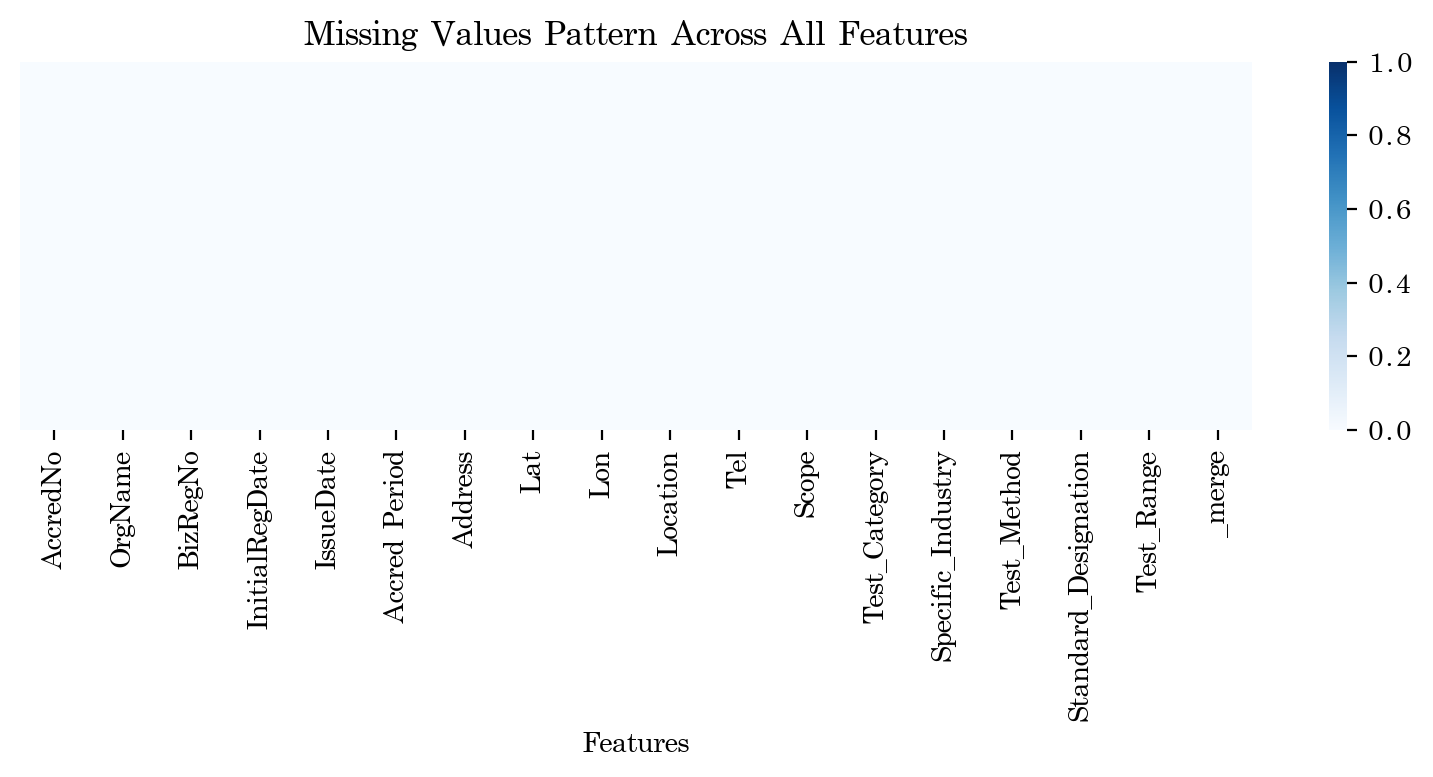

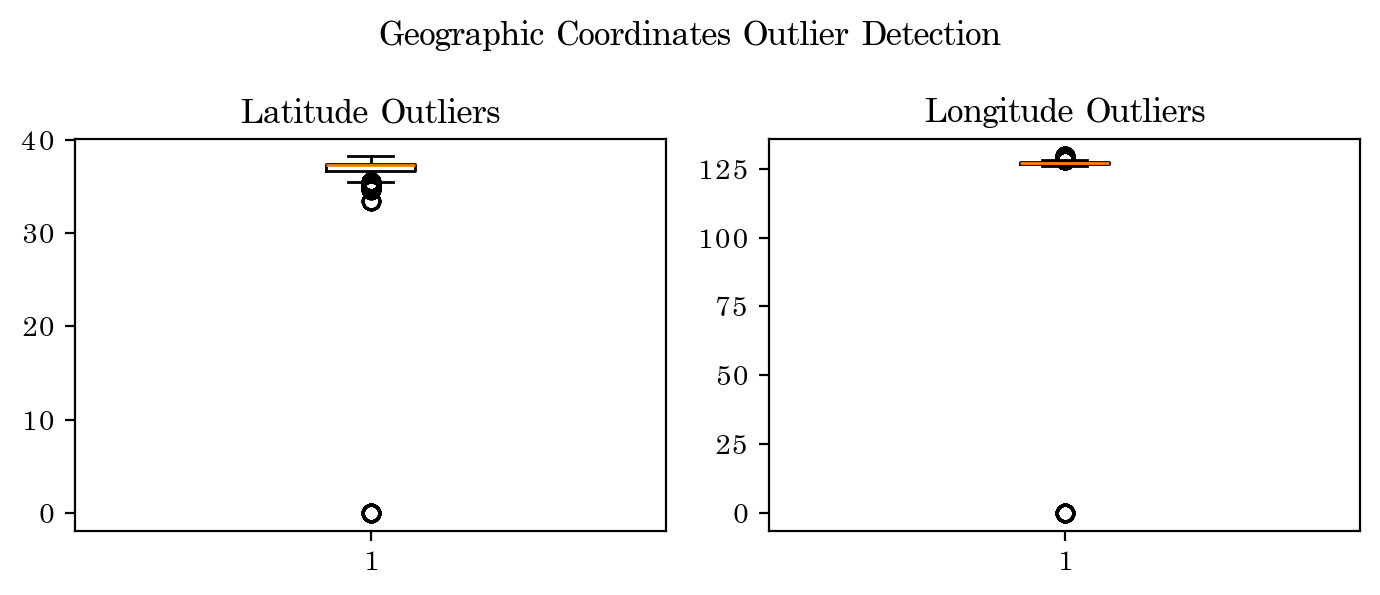


DATA CLEANING SUMMARY
Total Records: 41,186
Unique Organizations: 835
Complete Records: 41,185 (100.0%)
Records with Missing Values: 1 (0.0%)


In [358]:
# 색상 팔레트 정의
COLOR_PALETTE = {
    'primary': '#2E86AB',    # 진한 파랑
    'secondary': '#A23B72',   # 보라
    'accent': '#F18F01',      # 주황
    'neutral': '#C73E1D'      # 빨강
}

FIG_WIDTH = 8
FIG_HEIGHT = 4

# 1. Missing Values Heatmap
plt.figure(figsize=(FIG_WIDTH, FIG_HEIGHT))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues', yticklabels=False)
plt.title('Missing Values Pattern Across All Features', fontsize=12, fontweight='bold')
plt.xlabel('Features', fontsize=10)
plt.tight_layout()
plt.show()

duplicate_counts = df['AccredNo'].value_counts()
duplicates = duplicate_counts[duplicate_counts > 1]

partial_rows = df.isnull().any(axis=1).sum()
complete_rows = len(df) - partial_rows

# Outlier detection (lat/lon)
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[0].boxplot(df['Lat'].dropna())
ax[0].set_title('Latitude Outliers')
ax[1].boxplot(df['Lon'].dropna())
ax[1].set_title('Longitude Outliers')
plt.suptitle('Geographic Coordinates Outlier Detection')
plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("DATA CLEANING SUMMARY")
print("="*50)
print(f"Total Records: {len(df):,}")
print(f"Unique Organizations: {df['AccredNo'].nunique()}")
print(f"Complete Records: {complete_rows:,} ({100*complete_rows/len(df):.1f}%)")
print(f"Records with Missing Values: {partial_rows:,} ({100*partial_rows/len(df):.1f}%)")
print("="*50)

### 🟥 **EDA**

Total 835 unique accredited organizations analyzed


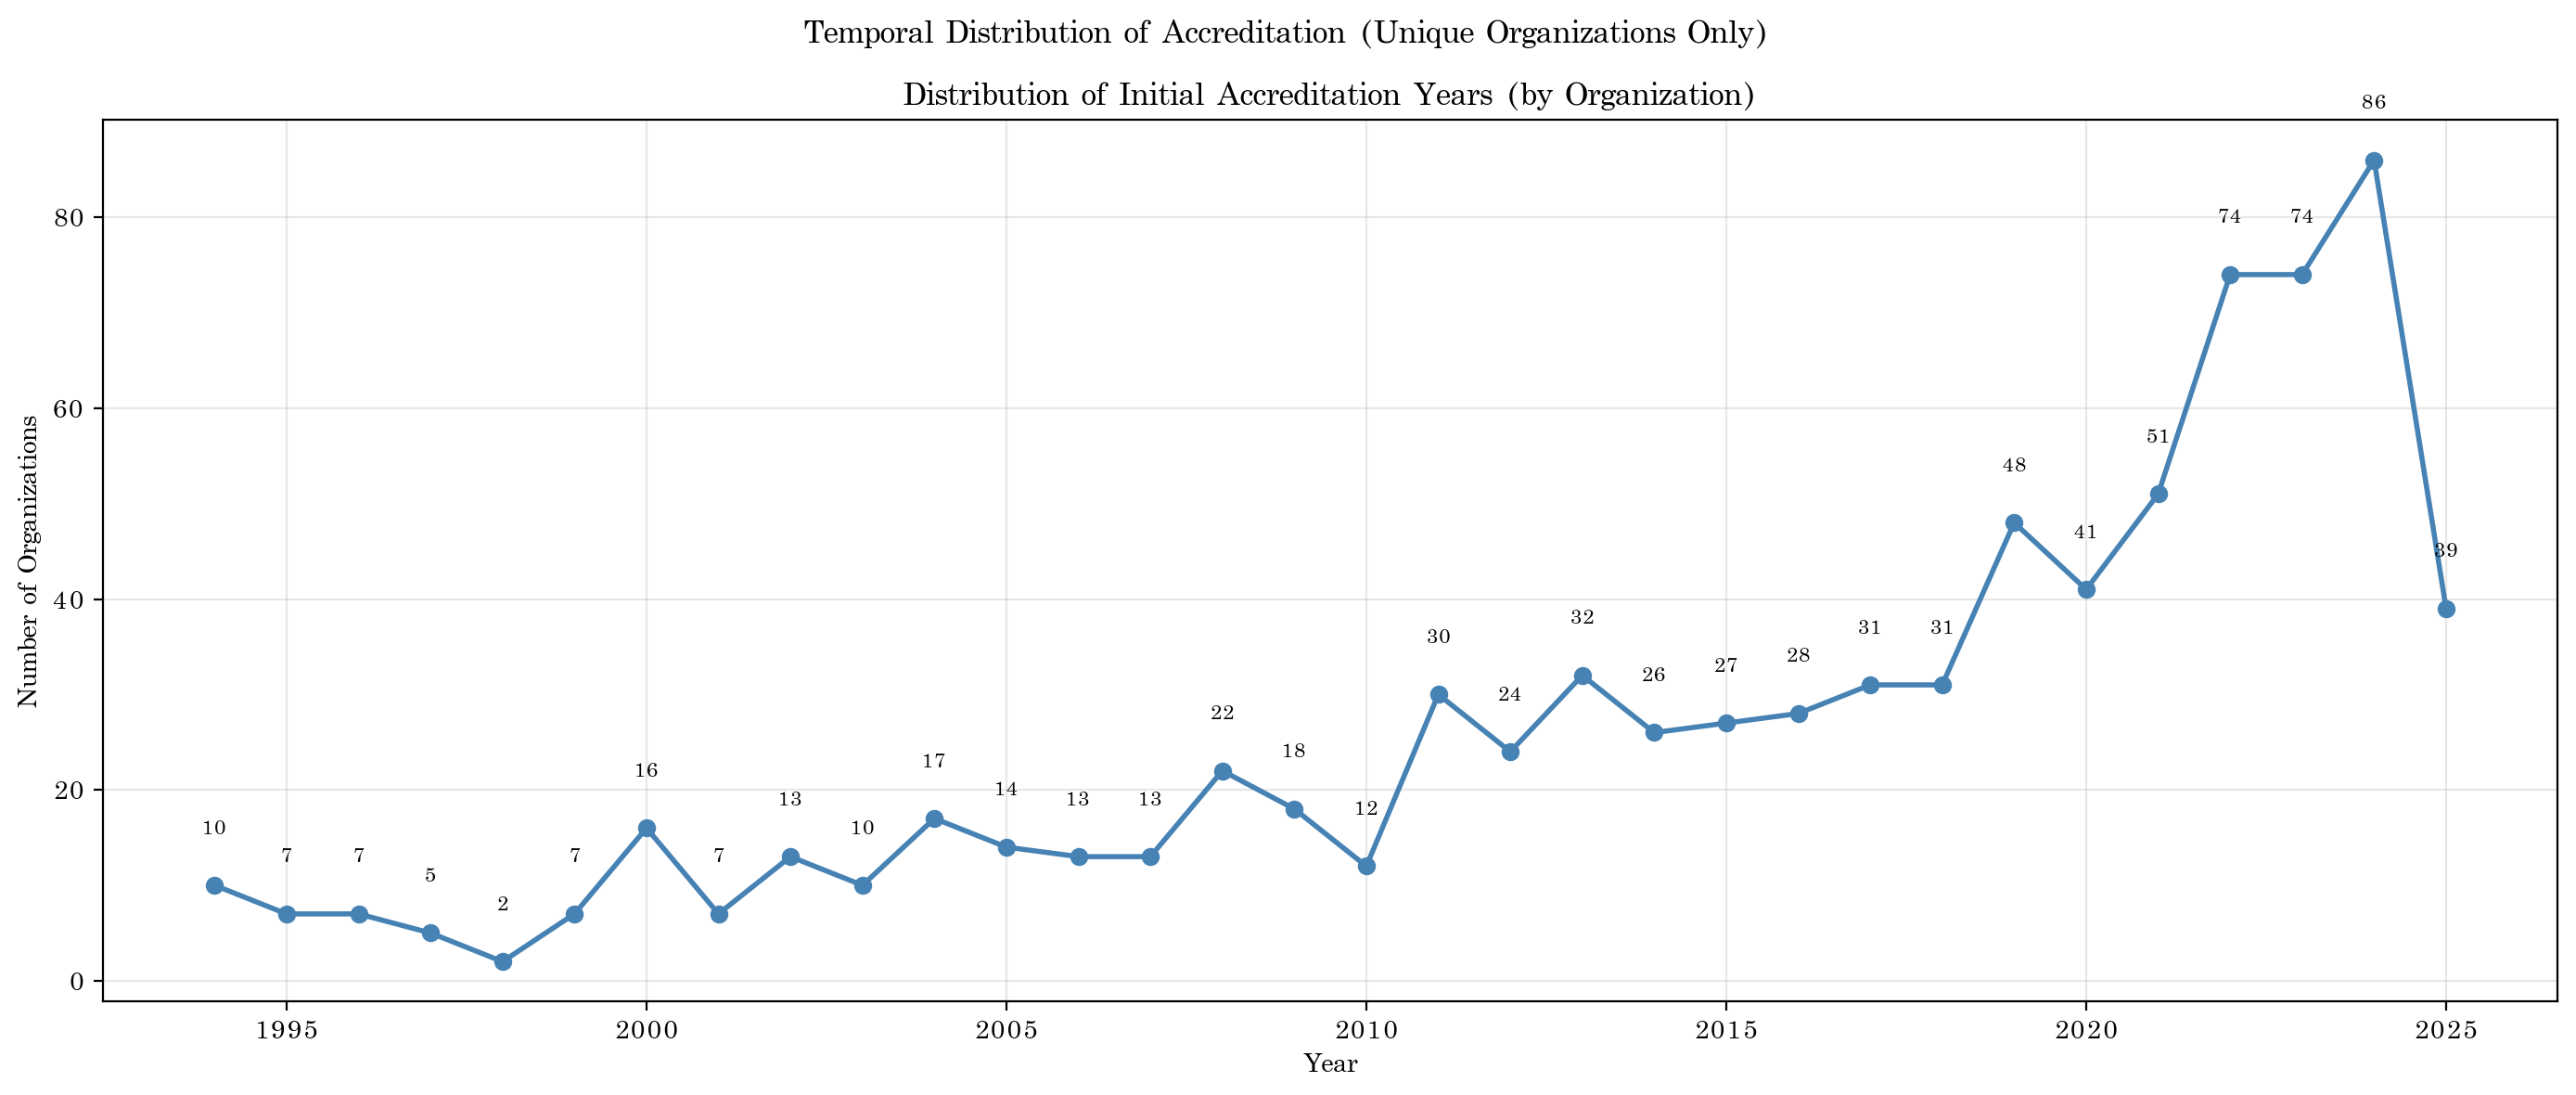

Date Range: 1994 - 2025


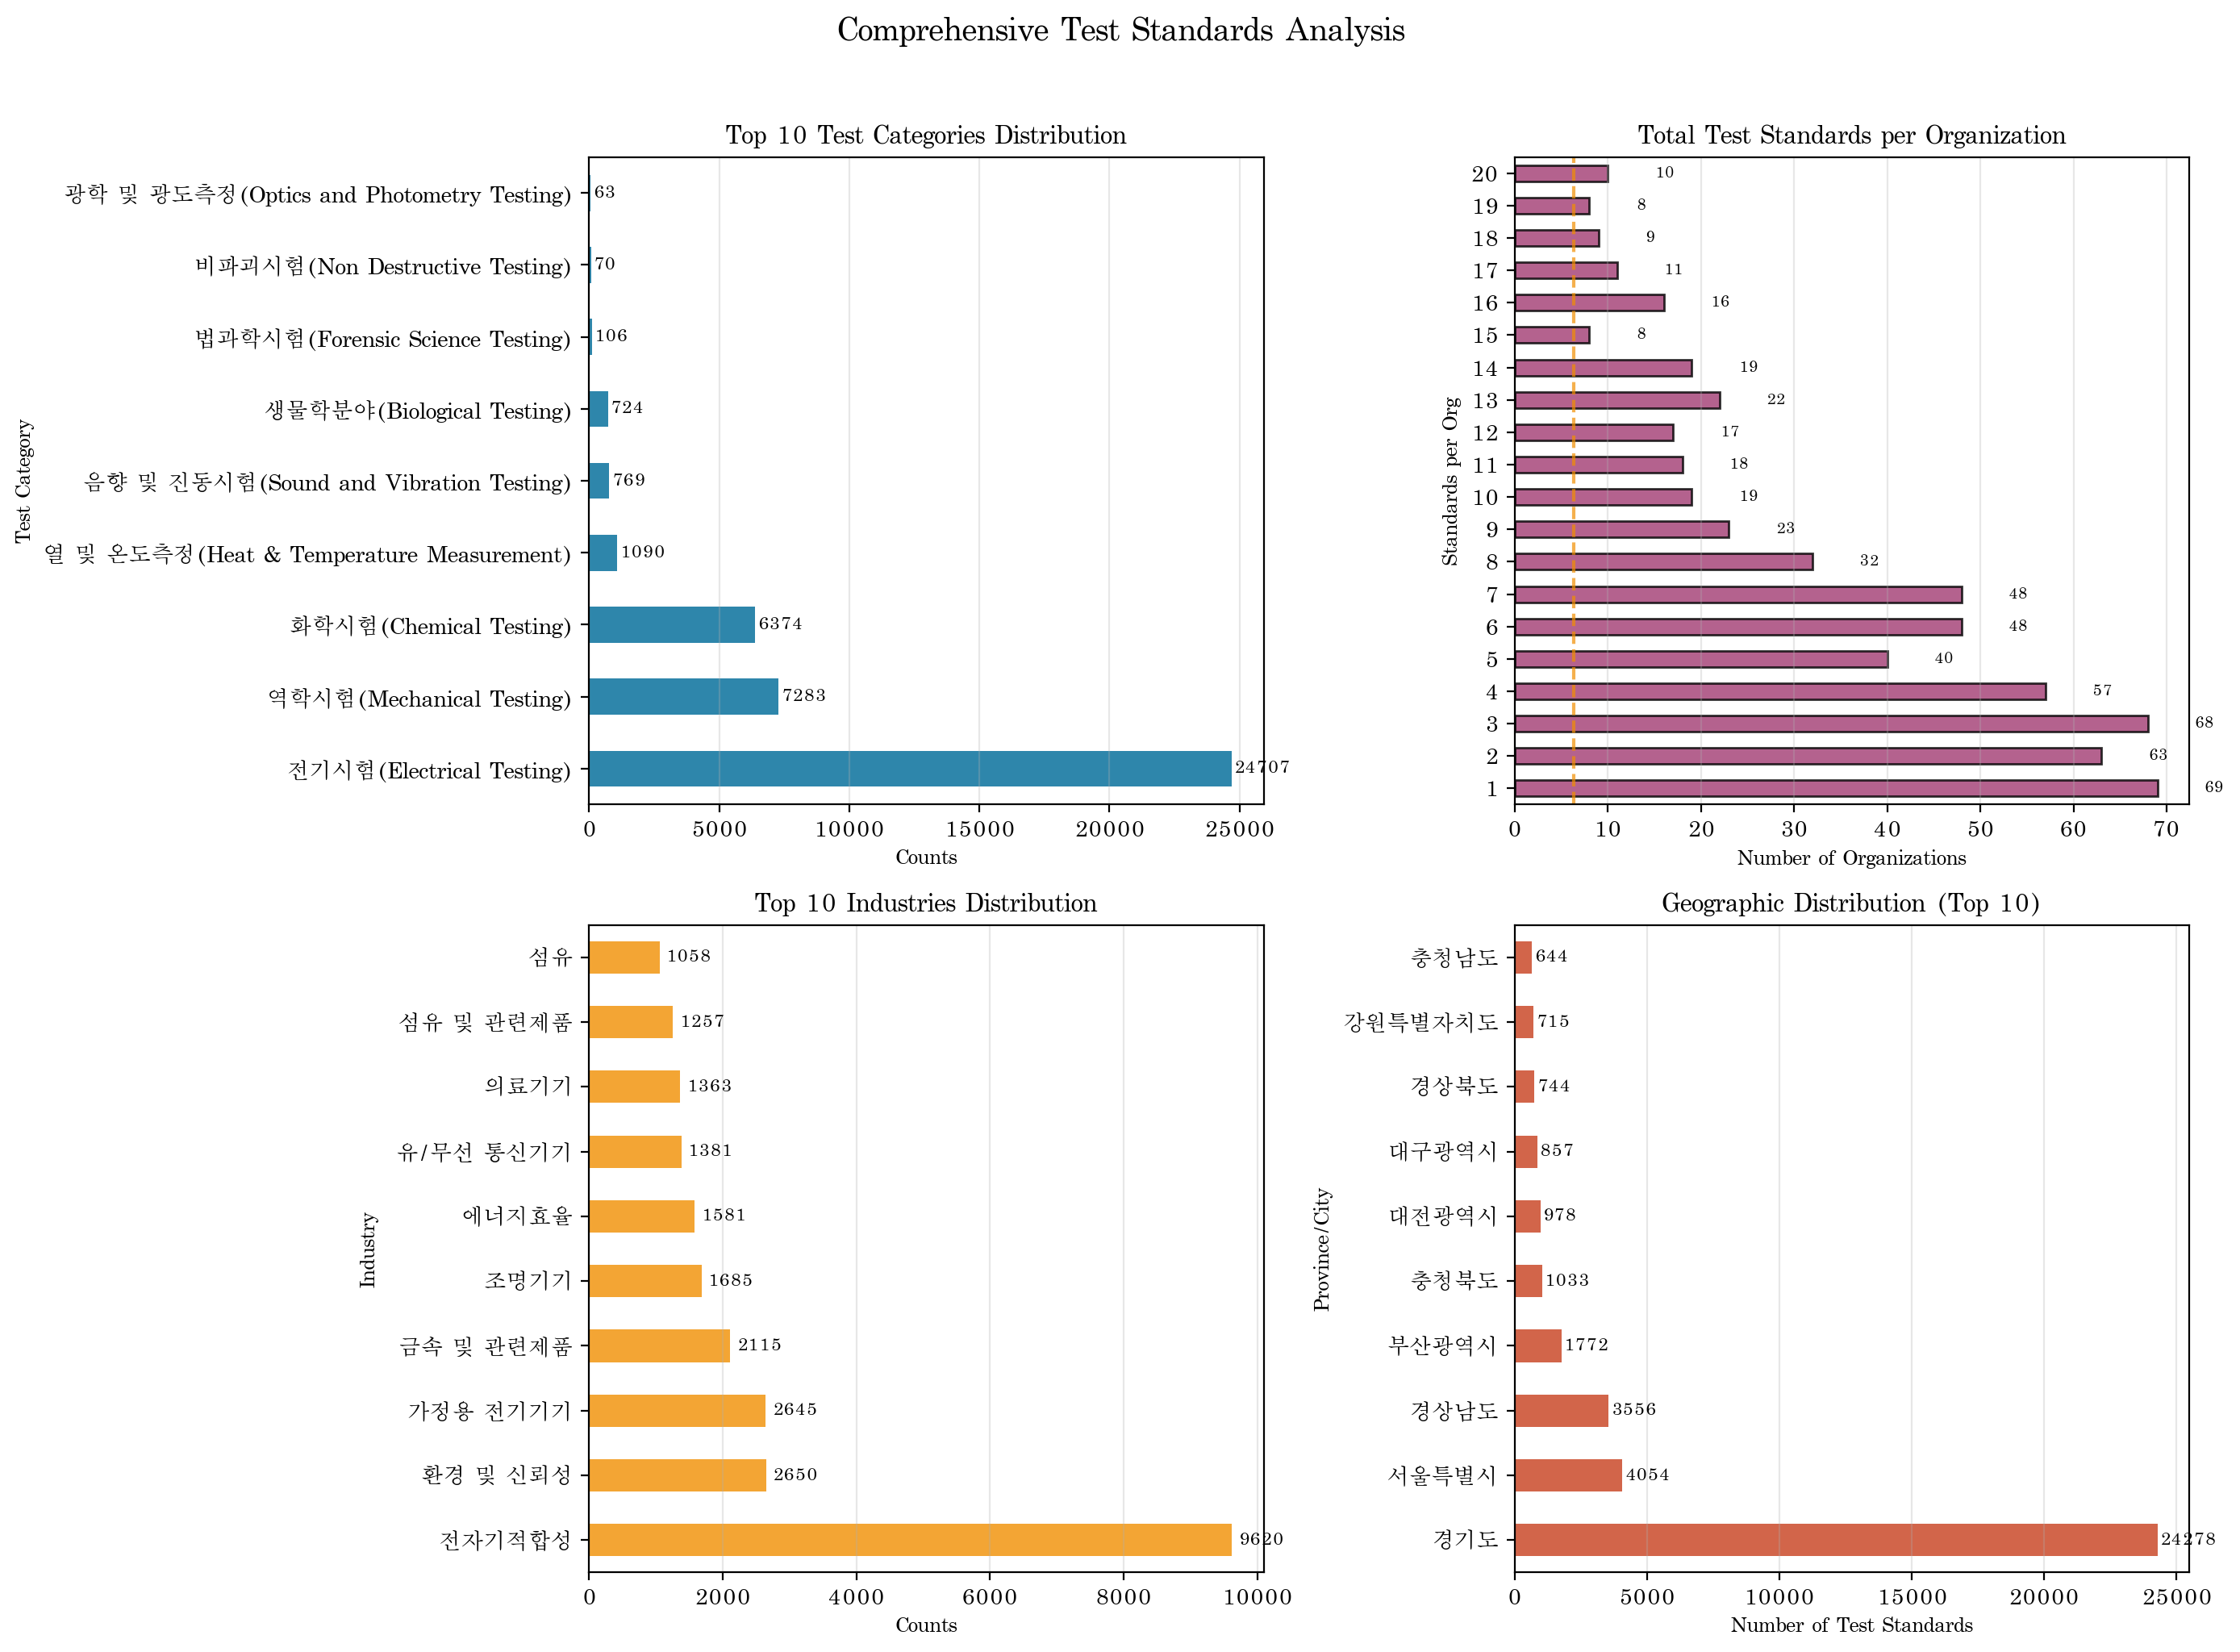


Analysis Results:
- Organizations with 1 test standard: 69
- Maximum test standards in one organization: 3034
- Average test standards per organization: 49.3
- Most common industry:  전자기적합성 (9620 standards)
- Most common location: 경기도 (24278 standards)


In [331]:
# EDA: Date Distribution Analysis
# Convert dates to datetime first
df['InitialRegDate'] = pd.to_datetime(df['InitialRegDate'], errors='coerce')
df['IssueDate'] = pd.to_datetime(df['IssueDate'], errors='coerce')

# Extract years
df['Initial_Year'] = df['InitialRegDate'].dt.year
df['Issue_Year'] = df['IssueDate'].dt.year

# Remove duplicates by organization (extract initial accreditation year and latest issue date for each org)
unique_labs = df.groupby('AccredNo').agg({
    'Initial_Year': 'min',  # Initial accreditation year for each organization
    'Issue_Year': 'max',     # Latest issue year for each organization
    'OrgName': 'first'       # Organization name
}).reset_index()

print(f"Total {len(unique_labs)} unique accredited organizations analyzed")

# Plot 2 datetime distribution as line charts
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Initial Year distribution (initial accreditation year by organization)
initial_year_counts = unique_labs['Initial_Year'].value_counts().sort_index()
plt.plot(initial_year_counts.index, initial_year_counts.values,  color='steelblue', marker='o', linewidth=2, markersize=6)
plt.title('Distribution of Initial Accreditation Years (by Organization)')
plt.xlabel('Year')
plt.ylabel('Number of Organizations')
plt.grid(True, alpha=0.3)

# Display values on top of each point
for year, count in zip(initial_year_counts.index, initial_year_counts.values):
    plt.text(year, count + 5, str(count), ha='center', va='bottom', fontsize=8)

plt.suptitle('Temporal Distribution of Accreditation (Unique Organizations Only)')
plt.tight_layout()
plt.show()

print(f"Date Range: {unique_labs['Initial_Year'].min():.0f} - {unique_labs['Issue_Year'].max():.0f}")
#print(initial_year_counts)


# Create 2x2 subplot for Test Categories and Standards Distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Top left: Test Categories Distribution (horizontal)
test_counts = df['Test_Category'].value_counts().head(10)  # Top 10 only
ax1 = test_counts.plot(kind='barh', ax=axes[0, 0], color=COLOR_PALETTE['primary'])
for i, v in enumerate(test_counts.values):
    ax1.text(v + 100, i, str(v), va='center', fontsize=8, fontweight='bold')
axes[0, 0].set_title('Top 10 Test Categories Distribution', fontsize=11, fontweight='bold')
axes[0, 0].set_xlabel('Counts', fontsize=9)
axes[0, 0].set_ylabel('Test Category', fontsize=9)
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Top right: Test Standards Distribution per Organization (horizontal)
duplicate_counts = df['AccredNo'].value_counts()
scope_distribution = duplicate_counts.value_counts().sort_index()
max_display = min(20, len(scope_distribution))  # Display up to 20 for 2x2 layout
scope_distribution_limited = scope_distribution.iloc[:max_display]

ax2 = scope_distribution_limited.plot(kind='barh', ax=axes[0, 1], color=COLOR_PALETTE['secondary'], edgecolor='black', alpha=0.8)
for i, (key, value) in enumerate(scope_distribution_limited.items()):
    ax2.text(value + 5, i, str(value), va='center', ha='left', fontsize=7, fontweight='bold')
axes[0, 1].set_title('Total Test Standards per Organization', fontsize=11, fontweight='bold')
axes[0, 1].set_xlabel('Number of Organizations', fontsize=9)
axes[0, 1].set_ylabel('Standards per Org', fontsize=9)
axes[0, 1].axvline(x=duplicate_counts.value_counts().mean(), color=COLOR_PALETTE['accent'], linestyle='--', linewidth=1.5, alpha=0.7)
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Bottom left: Top 10 Industries Distribution
industry_counts = df['Specific_Industry'].value_counts().head(10)
ax3 = industry_counts.plot(kind='barh', ax=axes[1, 0], color=COLOR_PALETTE['accent'], alpha=0.8)
for i, v in enumerate(industry_counts.values):
    ax3.text(v + 100, i, str(v), va='center', fontsize=8, fontweight='bold')
axes[1, 0].set_title('Top 10 Industries Distribution', fontsize=11, fontweight='bold')
axes[1, 0].set_xlabel('Counts', fontsize=9)
axes[1, 0].set_ylabel('Industry', fontsize=9)
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Bottom right: Geographic distribution by province
df['Province'] = df['Address'].str.extract(r'^(\S+도|\S+시)')[0]
province_counts = df['Province'].value_counts().head(10)
ax4 = province_counts.plot(kind='barh', ax=axes[1, 1], color=COLOR_PALETTE['neutral'], alpha=0.8)
for i, v in enumerate(province_counts.values):
    ax4.text(v + 100, i, str(v), va='center', fontsize=8, fontweight='bold')
axes[1, 1].set_title('Geographic Distribution (Top 10)', fontsize=11, fontweight='bold')
axes[1, 1].set_xlabel('Number of Test Standards', fontsize=9)
axes[1, 1].set_ylabel('Province/City', fontsize=9)
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.suptitle('Comprehensive Test Standards Analysis', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"\nAnalysis Results:")
print(f"- Organizations with 1 test standard: {scope_distribution.get(1, 0)}")
print(f"- Maximum test standards in one organization: {duplicate_counts.max()}")
print(f"- Average test standards per organization: {duplicate_counts.mean():.1f}")
print(f"- Most common industry: {industry_counts.index[0]} ({industry_counts.values[0]} standards)")
print(f"- Most common location: {province_counts.index[0]} ({province_counts.values[0]} standards)")

#### 🔴 Correlation Analysis 

Test_Category,광학 및 광도측정(Optics and Photometry Testing),법과학시험(Forensic Science Testing),비파괴시험(Non Destructive Testing),생물학분야(Biological Testing),역학시험(Mechanical Testing),열 및 온도측정(Heat & Temperature Measurement),음향 및 진동시험(Sound and Vibration Testing),전기시험(Electrical Testing),화학시험(Chemical Testing)
Initial_Year,,,,,,,,,
1994,3,0,0,126,2893,218,188,7241,1950
1995,0,0,0,0,92,98,25,21,112
1996,0,0,0,0,73,14,28,5,193
1997,0,0,0,5,56,2,6,99,22
1998,3,0,0,0,8,6,0,522,1
1999,0,0,17,0,96,0,0,2335,43
2000,24,0,0,14,299,30,0,1731,309
2001,0,3,0,11,109,0,0,360,119
2002,0,0,0,34,67,199,0,1244,123


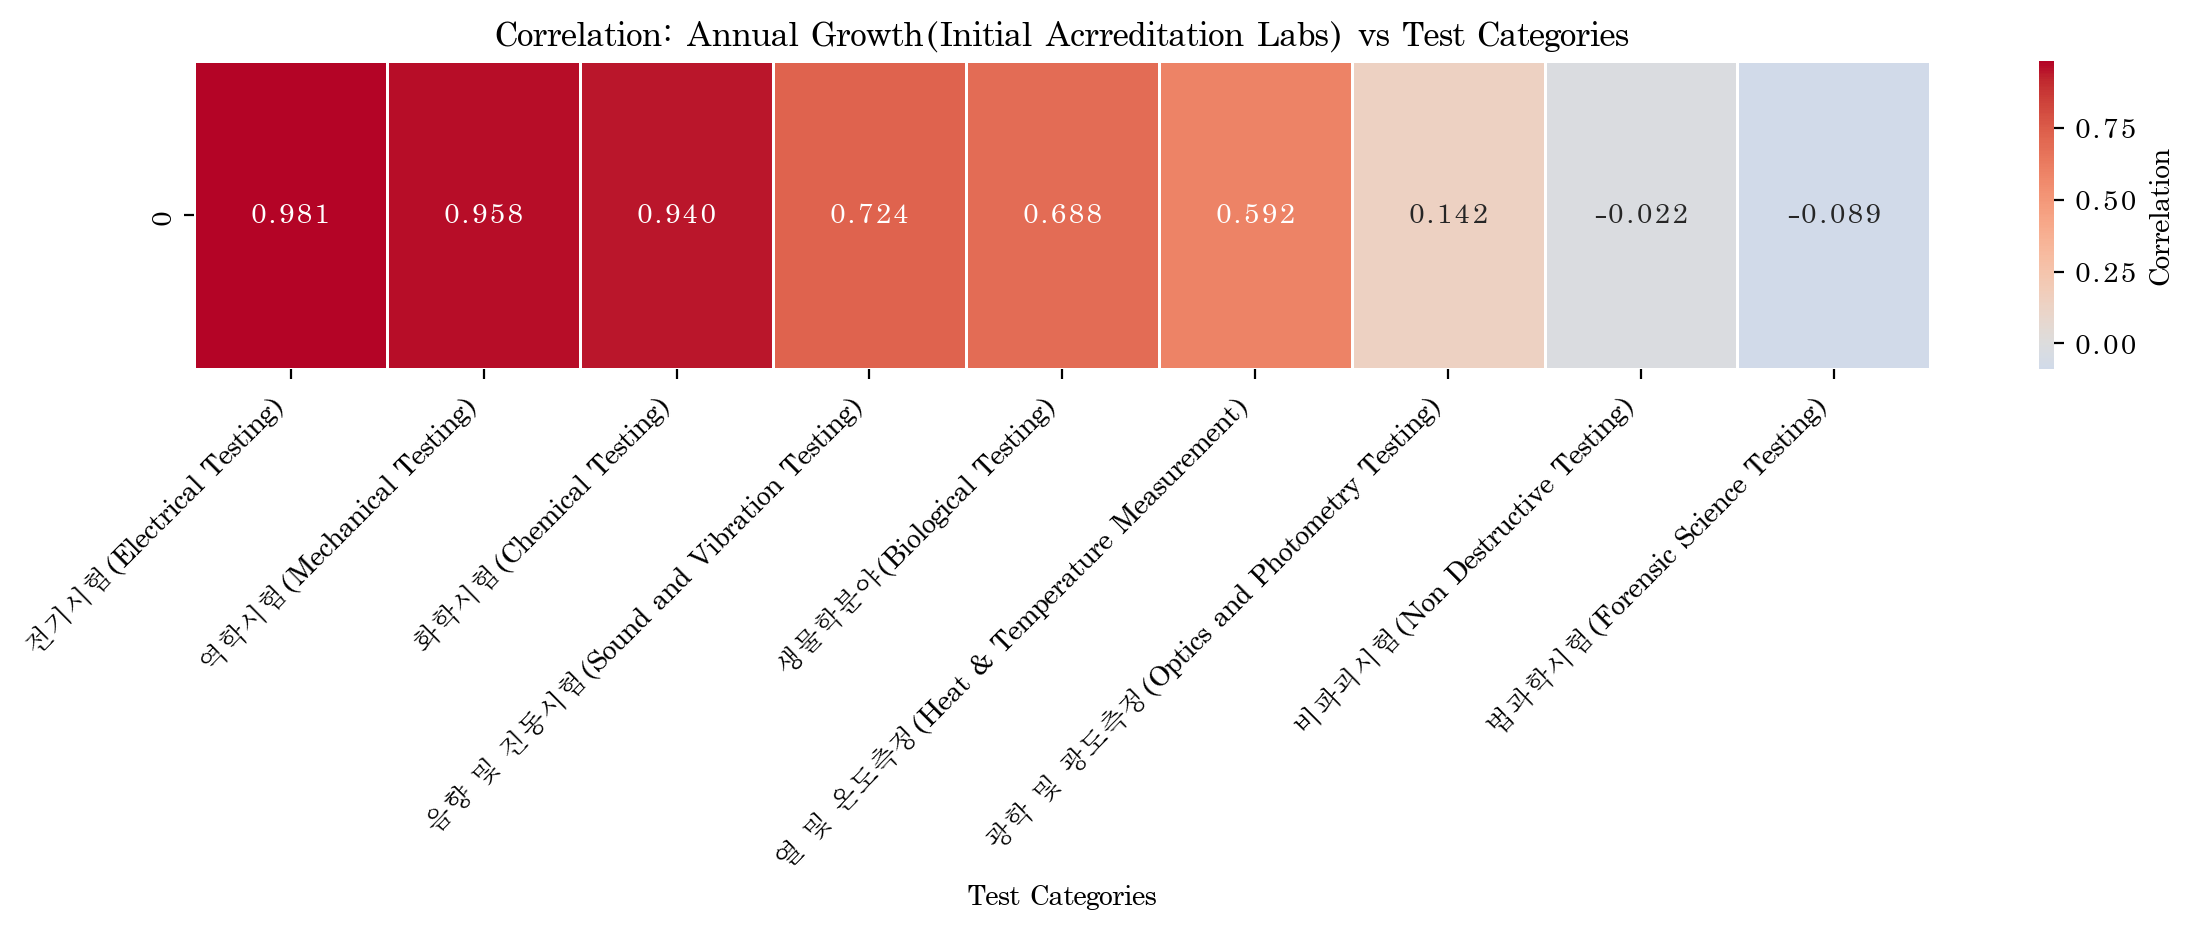

In [332]:

# 1. 기관 레벨로 집계
org_level = df.groupby(['AccredNo', 'Initial_Year']).agg({
    'Test_Category': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],
    'Specific_Industry': 'first',
    'Province': 'first',
    'Lat': 'first',
    'Lon': 'first'
}).reset_index()

#print(f"Organization level data: {org_level.shape}")
#display(org_level.head(5))
# 2. 연도별 트렌드 분석
yearly_trends = org_level.groupby('Initial_Year').agg({
    'AccredNo': 'count',  # 그 해 신규 기관 수
    'Test_Category': lambda x: x.value_counts().index[0],  # 주요 분야
    'Province': 'nunique'  # 지역 다양성
}).reset_index()

# 3. 연도별 성장률과 분야별 성장 상관관계
category_growth = df.groupby(['Initial_Year', 'Test_Category']).size().unstack(fill_value=0)
display(category_growth[:10])

correlation_with_growth = category_growth.corrwith(category_growth.sum(axis=1))
#print("\n=== 연도별 성장과 분야별 상관관계 ===")
#print(correlation_with_growth.sort_values(ascending=False))


# correlation_with_growth 값들을 히트맵으로 시각화
correlation_df = correlation_with_growth.sort_values(ascending=False).to_frame().T

plt.figure(figsize=(14, 2))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0,
            fmt='.3f', linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation: Annual Growth(Initial Acrreditation Labs) vs Test Categories', fontsize=12, fontweight='bold')
plt.xlabel('Test Categories')
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Total unique organizations accredited in 2022-2023: 234
- 2022: 74 organizations
- 2023: 74 organizations
- 2024: 86 organizations


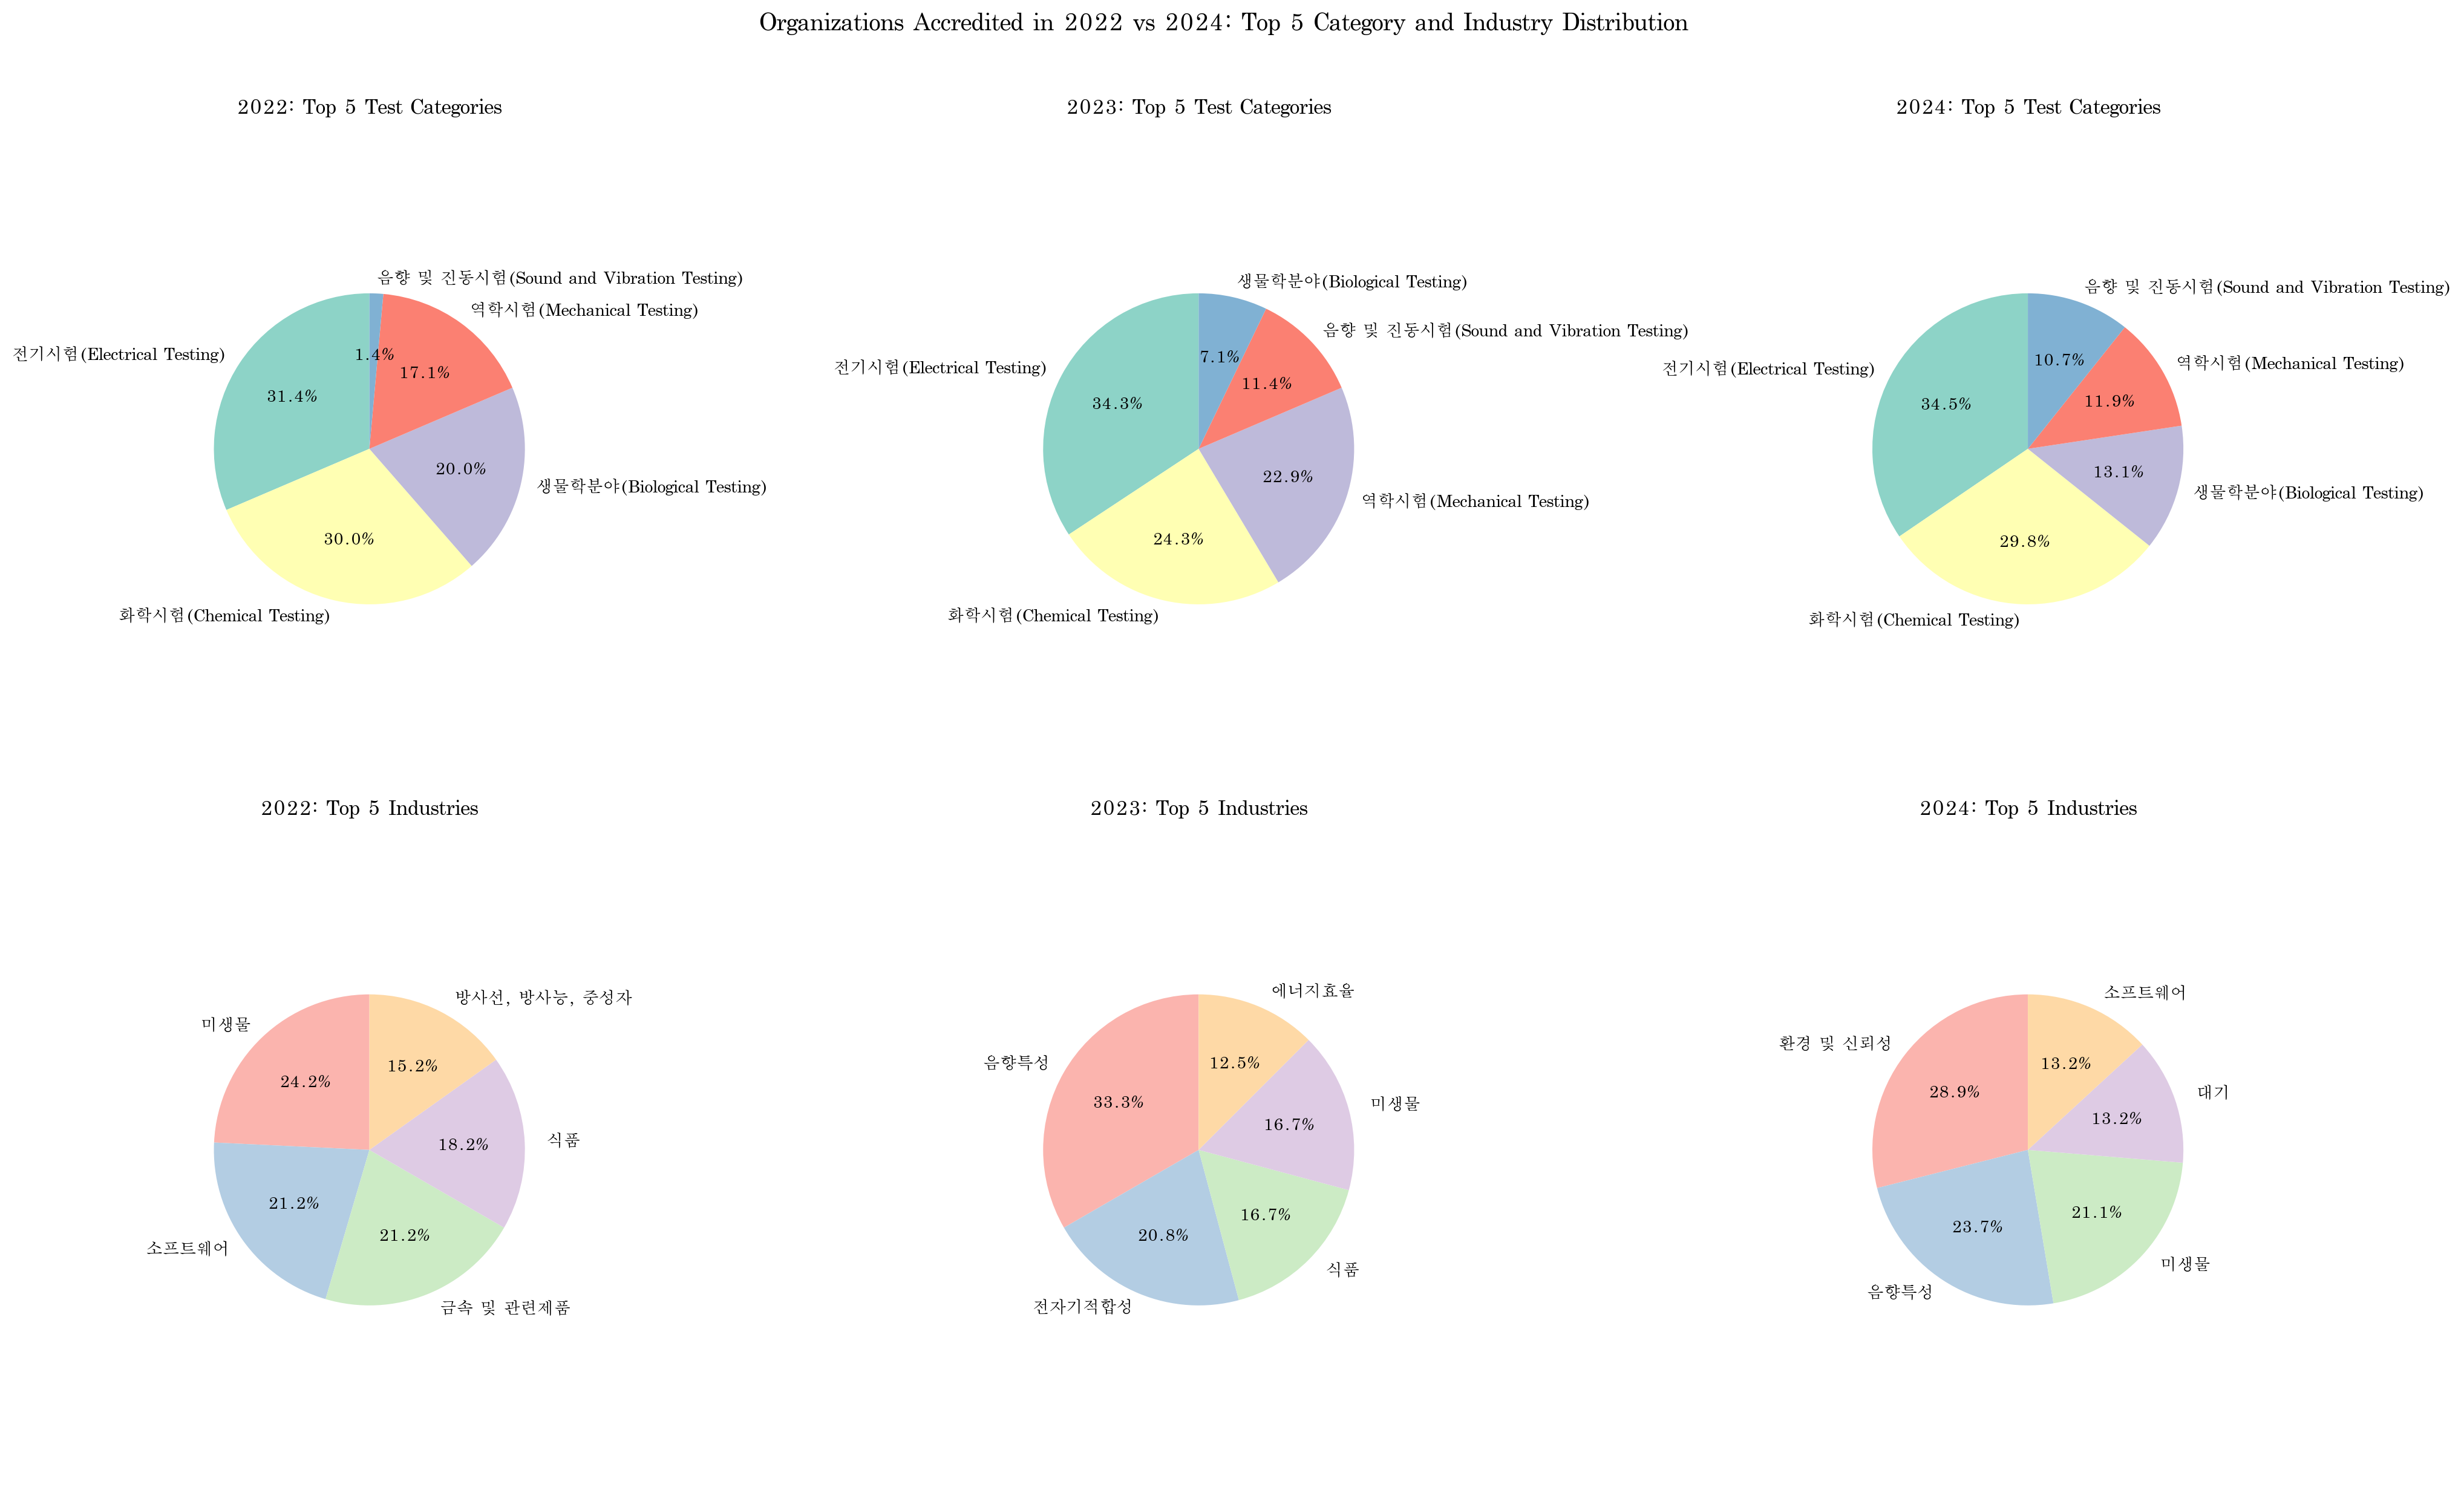

In [333]:
# Analysis of organizations accredited in 2022 and 2023 - TOP 5 Only with Consistent Styling

# Filter data for 2022 and 2023
df_2022_2024 = df[df['Initial_Year'].isin([2022, 2023, 2024])]

# Get unique organizations only (remove duplicate test standards)
orgs_2022_2024 = df_2022_2024.groupby('AccredNo').agg({
    'Initial_Year': 'first',
    'Test_Category': lambda x: x.mode()[0] if len(x.mode()) > 0 else x.iloc[0],
    'Specific_Industry': 'first'
}).reset_index()

print(f"Total unique organizations accredited in 2022-2023: {len(orgs_2022_2024)}")
print(f"- 2022: {len(orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2022])} organizations")
print(f"- 2023: {len(orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2023])} organizations")
print(f"- 2024: {len(orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2024])} organizations")

#---------------------------------------------------------------------------------------  
# Create pie charts - 3x2 layout
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Get combined categories and industries for consistent colors
combined_test_cat = orgs_2022_2024['Test_Category'].value_counts().head(5)
combined_industry = orgs_2022_2024['Specific_Industry'].value_counts().head(5)
colors1 = plt.cm.Set3(range(len(combined_test_cat)))
colors2 = plt.cm.Pastel1(range(len(combined_industry)))

# 1. Test Category distribution for 2022 - TOP 5
test_cat_2022 = orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2022]['Test_Category'].value_counts().head(5)
wedges, texts, autotexts = axes[0, 0].pie(test_cat_2022.values, 
                                        labels=test_cat_2022.index, 
                                        autopct='%1.1f%%', 
                                        startangle=90,
                                        colors=colors1,
                                        textprops={'fontsize': 10})
axes[0, 0].set_title('2022: Top 5 Test Categories', fontsize=12, fontweight='bold')
axes[0, 0].axis('equal')

# 2. Test Category distribution for 2023 - TOP 5
test_cat_2023 = orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2023]['Test_Category'].value_counts().head(5)
wedges, texts, autotexts = axes[0, 1].pie(test_cat_2023.values, 
                                        labels=test_cat_2023.index, 
                                        autopct='%1.1f%%', 
                                        startangle=90,
                                        colors=colors1,
                                        textprops={'fontsize': 10})
axes[0, 1].set_title('2023: Top 5 Test Categories', fontsize=12, fontweight='bold')
axes[0, 1].axis('equal')

test_cat_2024 = orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2024]['Test_Category'].value_counts().head(5)
wedges, texts, autotexts = axes[0, 2].pie(test_cat_2024.values, 
                                        labels=test_cat_2024.index, 
                                        autopct='%1.1f%%', 
                                        startangle=90,
                                        colors=colors1,
                                        textprops={'fontsize': 10})
axes[0, 2].set_title('2024: Top 5 Test Categories', fontsize=12, fontweight='bold')
axes[0, 2].axis('equal')


# 3. Specific Industry distribution for 2022 - TOP 5
industry_2022 = orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2022]['Specific_Industry'].value_counts().head(5)
wedges, texts, autotexts = axes[1, 0].pie(industry_2022.values, 
                                        labels=industry_2022.index, 
                                        autopct='%1.1f%%', 
                                        startangle=90,
                                        colors=colors2,
                                        textprops={'fontsize': 10})
axes[1, 0].set_title('2022: Top 5 Industries', fontsize=12, fontweight='bold')
axes[1, 0].axis('equal')

# 4. Specific Industry distribution for 2023 - TOP 5
industry_2023 = orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2023]['Specific_Industry'].value_counts().head(5)
wedges, texts, autotexts = axes[1, 1].pie(industry_2023.values, 
                                        labels=industry_2023.index, 
                                        autopct='%1.1f%%', 
                                        startangle=90,
                                        colors=colors2,
                                        textprops={'fontsize': 10})
axes[1, 1].set_title('2023: Top 5 Industries', fontsize=12, fontweight='bold')
axes[1, 1].axis('equal')


industry_2024 = orgs_2022_2024[orgs_2022_2024['Initial_Year'] == 2024]['Specific_Industry'].value_counts().head(5)
wedges, texts, autotexts = axes[1, 2].pie(industry_2024.values, 
                                        labels=industry_2024.index, 
                                        autopct='%1.1f%%', 
                                        startangle=90,
                                        colors=colors2,
                                        textprops={'fontsize': 10})
axes[1, 2].set_title('2024: Top 5 Industries', fontsize=12, fontweight='bold')
axes[1, 2].axis('equal')


plt.suptitle('Organizations Accredited in 2022 vs 2024: Top 5 Category and Industry Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------


### 🟥 EDA Summary

Through comprehensive EDA of 41,186 test standards across 835 accredited testing organizations spanning 30 years(1995~2025), several meaningful insights found: 

**Steady Growth Trajectory:** The distribution reveals a consistent upward trend in ISO/IEC 17025 accreditations from 1995 to 2024, with annual new organizations growing from single digits in the early 2000s to 86 by 2024, demonstrating the increasing importance of quality assurance standards in Korean industry. 

**3 Growth Phase:** The data reveals three distinct growth phases: steady increase(1994-2018:10-31 range), initial acceleration(2019-2021:41-51), and dramatic expansion(2022-2024:74-86), with the 2022 marking a 45% YoY increase that estabilished a new baseline for accreditation volume. Overall, suggesting not market maturation but rather an ongoing expansion driven by evolving regulatory requirements or new industry sectors entering  the accreditation system for example robot, drone, AI, EV etc.

**Forseen Challenges for prediction:** External factors such as economic conditions, regulatory changes, and government policies—which significantly impact accreditation demand—are not included, limiting the accuracy of future predictions.

This EDA provides a solid foundation for developing robust predictive models while acknowledging the complexity and limitations inherent in forecasting regulatory accreditation trends.

### 🟥 Modeling

**Model Selection:**
  - Time Series Models: **ARIMA/SARIMA** for capturing temporal
  dependencies and seasonality
    - <mark style="background-color: #fff700">**ARIMA**</mark> : focuses on trend and autoregressive patterns without considering seasonal components. This model <mark style="background-color: #fff700">**uses yearly aggregated data**</mark> to predict long-term growth trends.
    - <mark style="background-color: #fff700">**SARIMA**</mark> : extends ARIMA by incorporating seasonal patterns and periodic fluctuations. This model <mark style="background-color: #fff700">**uses monthly data**</mark> to capture seasonal behaviors in laboratory accreditation.

  - Ensemble Methods: Random Forest/Gradient Boosting to handle
   non-linear relationships and categorical variables

**Validation Approach:**
  - Temporal Split: Train on 2000-2020, validate on 2021-2023
  to assess real-world prediction capability
  - Cross-validation: Grouped by organization to prevent data
  leakage from multi-standard institutions

**Risk Mitigation:**
  - Baseline Models: Simple moving averages and linear trends
  as benchmark comparisons
  - Uncertainty Quantification: Confidence intervals for growth
   predictions acknowledging inherent volatility


##### 🔴 **Model #1: ARIMA**

In [334]:
# Model 1: ARIMA - Annual Time Series Prediction
from itertools import product
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("=" * 60)
print("MODEL 1: ARIMA (Annual Time Series)")
print("=" * 60)

# Use annual data from previous analysis
annual_ts = ts_data[ts_data.index <= 2024]  # From previous cells
train_size = int(len(annual_ts) * 0.8)
train_annual = annual_ts[:train_size]
test_annual = annual_ts[train_size:]

print(f"\nTraining period: {train_annual.index.min()}-{train_annual.index.max()} ({len(train_annual)} years)")
print(f"Testing period: {test_annual.index.min()}-{test_annual.index.max()} ({len(test_annual)} years)")

# Grid search for optimal ARIMA parameters
def evaluate_arima_model(data, arima_order):
    try:
        model = ARIMA(data, order=arima_order)
        fitted_model = model.fit()
        return fitted_model.aic
    except:
        return float('inf')

best_arima_aic = float('inf')
best_arima_params = None

print("\nOptimizing ARIMA parameters...")
for p, d, q in product(range(0, 4), range(0, 2), range(0, 4)): # to prevent overfitting take practical ranges applying rules of thumb
    aic = evaluate_arima_model(train_annual, (p, d, q))
    if aic < best_arima_aic:
        best_arima_aic = aic
        best_arima_params = (p, d, q)
    if aic != float('inf'):
        print(f"ARIMA({p},{d},{q}): AIC = {aic:.2f}")

print(f"\nBest ARIMA Model: ARIMA{best_arima_params} (AIC = {best_arima_aic:.2f})")

# Fit the best ARIMA model
arima_model = ARIMA(train_annual, order=best_arima_params)
fitted_arima = arima_model.fit()

# Predictions
arima_forecast = fitted_arima.forecast(steps=len(test_annual))
arima_mae = mean_absolute_error(test_annual, arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test_annual, arima_forecast))

print(f"\nARIMA Test Performance:")
print(f"  MAE: {arima_mae:.2f}")
print(f"  RMSE: {arima_rmse:.2f}")

# Store ARIMA results
globals()['fitted_arima'] = fitted_arima
globals()['arima_forecast'] = arima_forecast
globals()['best_arima_params'] = best_arima_params

MODEL 1: ARIMA (Annual Time Series)

Training period: 1994-2017 (24 years)
Testing period: 2018-2024 (7 years)

Optimizing ARIMA parameters...
ARIMA(0,0,0): AIC = 177.09
ARIMA(0,0,1): AIC = 170.69
ARIMA(0,0,2): AIC = 166.63
ARIMA(0,0,3): AIC = 167.23
ARIMA(0,1,0): AIC = 152.04
ARIMA(0,1,1): AIC = 146.79
ARIMA(0,1,2): AIC = 147.45
ARIMA(0,1,3): AIC = 148.91
ARIMA(1,0,0): AIC = 160.64
ARIMA(1,0,1): AIC = 157.78
ARIMA(1,0,2): AIC = 158.30
ARIMA(1,0,3): AIC = 158.68
ARIMA(1,1,0): AIC = 146.75
ARIMA(1,1,1): AIC = 147.87
ARIMA(1,1,2): AIC = 146.45
ARIMA(1,1,3): AIC = 148.45
ARIMA(2,0,0): AIC = 157.36
ARIMA(2,0,1): AIC = 158.83
ARIMA(2,0,2): AIC = 157.66
ARIMA(2,0,3): AIC = 159.41
ARIMA(2,1,0): AIC = 147.95
ARIMA(2,1,1): AIC = 149.82
ARIMA(2,1,2): AIC = 148.45
ARIMA(2,1,3): AIC = 150.38
ARIMA(3,0,0): AIC = 158.84
ARIMA(3,0,1): AIC = 160.78
ARIMA(3,0,2): AIC = 162.83
ARIMA(3,0,3): AIC = 158.25
ARIMA(3,1,0): AIC = 149.61
ARIMA(3,1,1): AIC = 151.57
ARIMA(3,1,2): AIC = 150.15
ARIMA(3,1,3): AIC = 

⭕️ ARIMA(1, 1, 2), AIC (Akaike Information Criterion) = 146.45

- Lower AIC is better and model is selected with the lowest AIC :  ARIMA(1, 1, 2)

⭕️ MAE = 21.47

 - This is considered a moderate level: the annual number of new organizations ranges from 10 to 86, the average error is about 22 organizations, and <span style="text-decoration: underline; text-decoration-color: red;"> **the relative error rate is approximately 25–30%.**</span>


⭕️ RMSE = 26.58

 - Moderate level — RMSE > MAE indicates the presence of large errors (sensitivity to outliers) and difficulty in predicting rapid growth periods (e.g., 2022–2024).


##### 🔴 **Model #2: SARIMA**

In [338]:
# Model 2: SARIMA - Monthly Time Series with Seasonality
print("\n" + "=" * 60)
print("MODEL 2: SARIMA (Monthly Time Series)")
print("=" * 60)

# Create monthly time series from existing data
try:
    # Create monthly time series from unique_labs data
    unique_labs_with_dates = df.groupby('AccredNo').agg({
        'InitialRegDate': 'first',
        'Initial_Year': 'first'
    }).reset_index()
    print(f"Unique labs with dates: {unique_labs_with_dates.shape}") #(835,3)
    display(unique_labs_with_dates.head(1))
    print("                 ↓↓↓")

    unique_labs_with_dates['InitialRegDate_parsed'] = pd.to_datetime(unique_labs_with_dates['InitialRegDate'])
    unique_labs_with_dates['YearMonth'] = unique_labs_with_dates['InitialRegDate_parsed'].dt.to_period('M')
    
    display(unique_labs_with_dates.head(1))


    # Create complete monthly time series (fill gaps) and filter to 2024
    monthly_counts = unique_labs_with_dates['YearMonth'].value_counts().sort_index()
    complete_range = pd.period_range(start=monthly_counts.index.min(), 
                                    end=monthly_counts.index.max(), freq='M')
    monthly_complete = monthly_counts.reindex(complete_range, fill_value=0)
    
    # Filter to 2024 and convert to datetime index for SARIMA
    monthly_2024 = monthly_complete[monthly_complete.index.year <= 2024]
    monthly_values = pd.Series(monthly_2024.values, 
                                index = pd.date_range(start=monthly_2024.index[0].to_timestamp(), 
                                                    periods=len(monthly_2024), freq='MS'))
    
    print(f"Monthly data: {len(monthly_values)} months ({monthly_values.index[0].strftime('%Y-%m')} to {monthly_values.index[-1].strftime('%Y-%m')})")

    print("                 ↓↓↓")
    display(monthly_values.head()) # 6 of 369 months (1994-04 to 2024-12)

    train_size = int(len(monthly_values) * 0.8)
    train_monthly = monthly_values[:train_size]
    test_monthly = monthly_values[train_size:]
    
    print(f"Training: {train_monthly.index[0].strftime('%Y-%m')} to {train_monthly.index[-1].strftime('%Y-%m')}")
    print(f"Testing: {test_monthly.index[0].strftime('%Y-%m')} to {test_monthly.index[-1].strftime('%Y-%m')}\n")
    
    # Optimize SARIMA parameters
    best_sarima_aic, best_sarima_params, best_sarima_seasonal = float('inf'), None, None
    
    # Grid search for SARIMA parameters
    # parameter explanation:
    # p, d, q: non-seasonal ARIMA parameters
    # P, D, Q: seasonal ARIMA parameters
    # m: number of periods in each season (12 for monthly data with yearly seasonality)

    #     - p (AR order): Number of autoregressive terms
    #         - p=1: Uses value from previous 1 month
    #         - p=2: Uses value from previous 2 months
    #         - p=0: Does not use past values
    #     - d (Differencing): Degree of differencing
    #         - d=1: First differencing (removes trend)
    #         - In most combinations, d=1 → removes trend from monthly data
    #     - q (MA order): Number of moving average terms
    #         - q=1: Uses error from previous 1 month

    #     - P (Seasonal AR): Seasonal autoregressive term
    #         - P=1: Uses value from 12 months ago (same month last year)(12개월 전 값 사용)
    #     - D (Seasonal Differencing): Seasonal differencing
    #         - D=0: No seasonal differencing
    #         - D=1: Differencing at 12-month intervals(12개월 간격 차분) (removes seasonal trend)
    #     - Q (Seasonal MA): Seasonal moving average term(계절성 이동평균)
    #         - Q=1: Uses error from 12 months ago (12개월 전 오차 사용)
    #     - s=12: Seasonal period (monthly data)

    for p, d, q in [(1, 1, 1), (2, 1, 1), (0, 1, 1)]: 
        for P, D, Q in [(1, 0, 1), (1, 1, 1)]:
            try:
                aic = SARIMAX(train_monthly, order=(p, d, q), seasonal_order=(P, D, Q, 12)).fit(disp=False).aic
                if aic < best_sarima_aic:
                    best_sarima_aic, best_sarima_params, best_sarima_seasonal = aic, (p, d, q), (P, D, Q, 12)
                print(f"SARIMA({p},{d},{q})×({P},{D},{Q},12): AIC = {aic:.2f}")
            except:
                continue
    
    if best_sarima_params:
        print(f"Best SARIMA: {best_sarima_params}×{best_sarima_seasonal} (AIC = {best_sarima_aic:.2f})")
        
        fitted_sarima = SARIMAX(train_monthly, order=best_sarima_params, seasonal_order=best_sarima_seasonal).fit(disp=False)
        sarima_forecast = fitted_sarima.forecast(steps=len(test_monthly))
        sarima_mae = mean_absolute_error(test_monthly, sarima_forecast)
        
        print(f"Test Performance: MAE = {sarima_mae:.2f}")
        
        globals().update({'fitted_sarima': fitted_sarima, 'sarima_mae': sarima_mae, 'monthly_values': monthly_values})
    else:
        fitted_sarima = None
        sarima_mae = None
        
except Exception as e:
    print(f"ERROR: Could not create monthly time series: {e}")
    fitted_sarima = None
    sarima_mae = None

# Model comparison
print(f"\n" + "=" * 60)
print("MODEL COMPARISON SUMMARY")
print("=" * 60)
print(f"Model 1 (ARIMA): AIC = {best_arima_aic:.2f}, MAE = {arima_mae:.2f}")

print(f"Model 2 (SARIMA): AIC = {best_sarima_aic:.2f}, MAE = {sarima_mae:.2f}")
better_model = "SARIMA" if sarima_mae < arima_mae else "ARIMA"
print(f"Better model based on MAE(prediction accuracy): {better_model}")
print("=" * 60)


MODEL 2: SARIMA (Monthly Time Series)
Unique labs with dates: (835, 3)


,AccredNo,InitialRegDate,Initial_Year
0,KT001,1994-04-02,1994


                 ↓↓↓


,AccredNo,InitialRegDate,Initial_Year,InitialRegDate_parsed,YearMonth
0,KT001,1994-04-02,1994,1994-04-02,1994-04


Monthly data: 369 months (1994-04 to 2024-12)
                 ↓↓↓


1994-04-01    4
1994-05-01    0
1994-06-01    0
1994-07-01    0
1994-08-01    0
Freq: MS, dtype: int64

Training: 1994-04 to 2018-10
Testing: 2018-11 to 2024-12

SARIMA(1,1,1)×(1,0,1,12): AIC = 1081.81
SARIMA(1,1,1)×(1,1,1,12): AIC = 1061.14
SARIMA(2,1,1)×(1,0,1,12): AIC = 1081.34
SARIMA(2,1,1)×(1,1,1,12): AIC = 1060.04
SARIMA(0,1,1)×(1,0,1,12): AIC = 1081.09
SARIMA(0,1,1)×(1,1,1,12): AIC = 1060.72
Best SARIMA: (2, 1, 1)×(1, 1, 1, 12) (AIC = 1060.04)
Test Performance: MAE = 2.84

MODEL COMPARISON SUMMARY
Model 1 (ARIMA): AIC = 146.45, MAE = 21.47
Model 2 (SARIMA): AIC = 1060.04, MAE = 2.84
Better model based on MAE(prediction accuracy): SARIMA


**⭕️ Model Comparison Summary**

- Model 1 (ARIMA): AIC = 146.45, MAE = 21.47
- Model 2 (SARIMA): AIC = 1060.04, MAE = 2.84

**⭕️ <span style="text-decoration: underline; text-decoration-color: red;"> **Selected model: SARIMA (based on prediction accuracy)**</span>:**

While ARIMA has lower AIC (146.45 vs 1060.04), SARIMA has much better prediction accuracy (MAE: 2.84 vs 21.47)
For forecasting tasks, prediction accuracy (MAE) is more important than model fit (AIC) Therefore, SARIMA will be used for final predictions.





##### 🔴 **Next 3 Years(2025-2027) Predictions with SARIMA**

In [336]:
# Future Predictions: 2025-2027 (3 Years)
print("\n" + "=" * 70)
print("⭕️ FUTURE PREDICTIONS: 2025-2027 (3 YEARS)")
print("=" * 70)

model_type = "SARIMA"

# Retrain SARIMA on full monthly dataset
full_monthly = monthly_values
#print(full_monthly.tail(1*12))  # Last 1 years of monthly data
sarima_final = SARIMAX(full_monthly, order=best_sarima_params, seasonal_order=best_sarima_seasonal)
fitted_final = sarima_final.fit(disp=False) # if disp = True, display the optimization output process


# Predict monthly for next 3 years (2025-2027)
future_months = 36  # 3 years * 12 months
monthly_predictions = fitted_final.forecast(steps=future_months)
monthly_ci = fitted_final.get_forecast(steps=future_months).conf_int(alpha=0.10)  # 90% CI

# Create future date index
last_date = full_monthly.index[-1]
future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_months, freq='MS')

# Aggregate to annual predictions
monthly_pred_df = pd.DataFrame({
    'prediction': monthly_predictions,
    'lower_ci': monthly_ci.iloc[:, 0],
    'upper_ci': monthly_ci.iloc[:, 1]
}, index=future_dates)

display(monthly_pred_df.head(3))  # First 3 months of predictions
print("                 ↓↓↓(Group by year)")

# Group by year
annual_predictions = monthly_pred_df.groupby(monthly_pred_df.index.year).agg({
    'prediction': 'sum',
    'lower_ci': 'sum', 
    'upper_ci': 'sum'
})
display(annual_predictions)

print(f"\n{model_type} Future Predictions:")
print("=" * 50)
for year, row in annual_predictions.iterrows():
    pred = max(0, round(row['prediction']))  # Ensure non-negative
    lower = max(0, round(row['lower_ci']))
    upper = max(0, round(row['upper_ci']))
    print(f"{year}: {pred:3d} organizations (90% CI: {lower:3d} - {upper:3d})")

# Calculate growth rates
print(f"\nProjected Growth Analysis:")
print("=" * 30)
current_2024 = annual_ts[2024] if 2024 in annual_ts.index else annual_ts.iloc[-1]
pred_2025 = max(0, round(annual_predictions.loc[2025, 'prediction']))
growth_2025 = ((pred_2025 - current_2024) / current_2024) * 100

print(f"2024 actual: {current_2024} organizations")
print(f"2025 prediction: {pred_2025} organizations")
print(f"2025 growth rate: {growth_2025:+.1f}%")

# Average annual growth for 2026-2027
avg_growth = annual_predictions['prediction'].pct_change().iloc[1:].mean() * 100
print(f"Average annual growth (2026-2027): {avg_growth:+.1f}%")

# Total new organizations over 3 years
total_new = annual_predictions['prediction'].sum()
print(f"Total new organizations (2025-2027): {round(total_new)} organizations")

# Store predictions for visualization
globals()['annual_predictions'] = annual_predictions
globals()['model_type'] = model_type
globals()['pred_2025'] = pred_2025



⭕️ FUTURE PREDICTIONS: 2025-2027 (3 YEARS)


,prediction,lower_ci,upper_ci
2025-01-01,5.690666,2.456941,8.924391
2025-02-01,7.179149,3.945169,10.413128
2025-03-01,7.419009,4.184612,10.653405


                 ↓↓↓(Group by year)


,prediction,lower_ci,upper_ci
2025,89.560252,50.421780,128.698725
2026,94.450124,54.018900,134.881348
2027,98.666511,56.844065,140.488957



SARIMA Future Predictions:
2025:  90 organizations (90% CI:  50 - 129)
2026:  94 organizations (90% CI:  54 - 135)
2027:  99 organizations (90% CI:  57 - 140)

Projected Growth Analysis:
2024 actual: 86 organizations
2025 prediction: 90 organizations
2025 growth rate: +4.7%
Average annual growth (2026-2027): +5.0%
Total new organizations (2025-2027): 283 organizations


##### 🔴 **Projected Growth Analysis:**

- 2024 actual: 86 organizations
- 2025 prediction: 90 organizations
- <mark style="background-color: #fff700"><span style="text-decoration: underline; text-decoration-color: red;"> **2025 growth rate: +4.7%** </span></mark>
- <mark style="background-color: #fff700"><span style="text-decoration: underline; text-decoration-color: red;"> **Average annual growth (2026-2027): +5.0%** </span></mark>
- Total new organizations (2025-2027): 283 organizations

##### 🔴 **Performance Evaluation and Visualization**


⭕️ MODEL PERFORMANCE EVALUATION AND VISUALIZATION


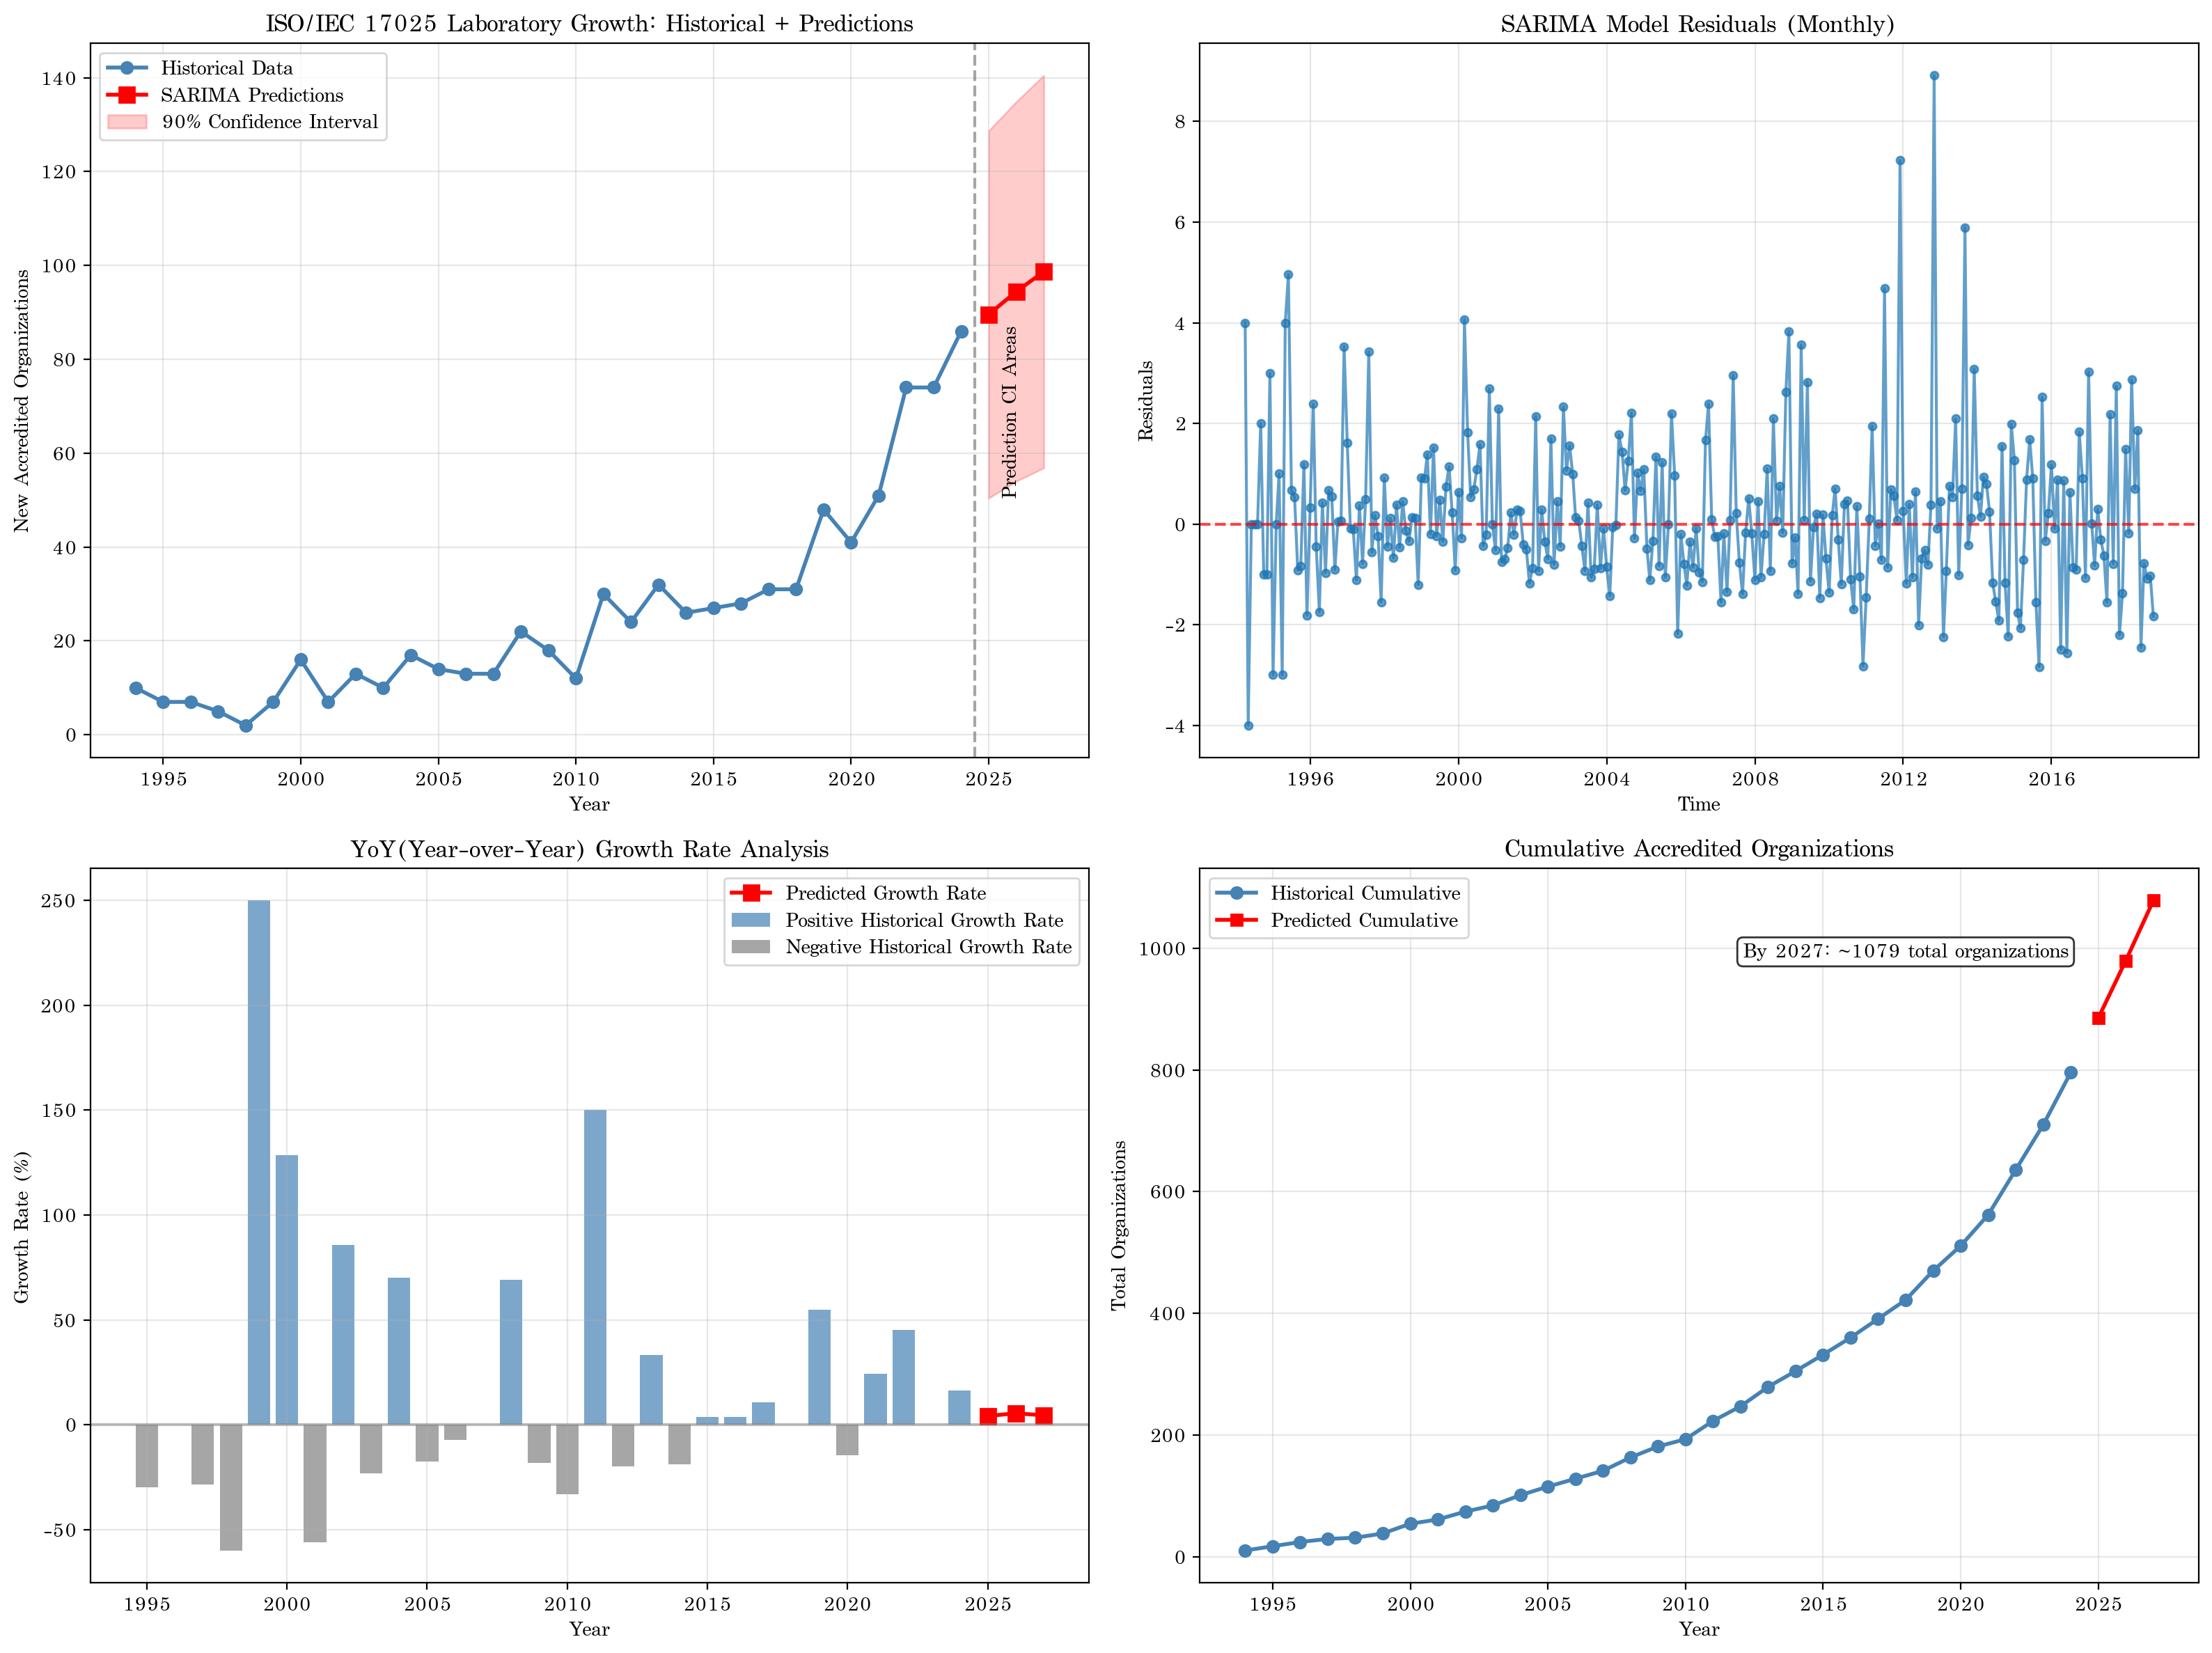

In [337]:
# Model Performance Evaluation and Visualization
print("\n" + "=" * 70)
print("⭕️ MODEL PERFORMANCE EVALUATION AND VISUALIZATION")
print("=" * 70)

# visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Historical Data + Future Predictions
# This plot shows actual historical data vs model predictions for future years
ax1 = axes[0, 0]
historical_years = annual_ts.index
historical_values = annual_ts.values

# Plot historical(past) data
ax1.plot(historical_years, historical_values, 'o-', linewidth=2, markersize=6,  color='steelblue', label='Historical Data')

# Plot predictions
pred_years = annual_predictions.index
pred_values = annual_predictions['prediction'].values
lower_ci = annual_predictions['lower_ci'].values
upper_ci = annual_predictions['upper_ci'].values

ax1.plot(pred_years, pred_values, 's-', linewidth=2, markersize=8, color='red', label=f'{model_type} Predictions')
ax1.fill_between(pred_years, lower_ci, upper_ci, alpha=0.2, color='red', label='90% Confidence Interval')

ax1.set_title('ISO/IEC 17025 Laboratory Growth: Historical + Predictions')
ax1.set_xlabel('Year')
ax1.set_ylabel('New Accredited Organizations')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add vertical line to separate historical and predicted
last_historical_year = historical_years[-1]
ax1.axvline(x=last_historical_year + 0.5, color='gray', linestyle='--', alpha=0.7)
ax1.text(last_historical_year + 1.5, max(historical_values) * 0.8, 'Prediction CI Areas', rotation=90, verticalalignment='center')


# 2. Model Residuals Analysis
# This plot shows prediction errors over time to check model performance
ax2 = axes[0, 1]

residuals = fitted_sarima.resid
ax2.plot(residuals.index, residuals.values, 'o-', alpha=0.7, markersize=4)
ax2.set_title('SARIMA Model Residuals (Monthly)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Residuals')
ax2.axhline(y=0, color='red', linestyle='--', alpha=0.7)
ax2.grid(True, alpha=0.3)


# 3. Growth Rate Analysis
# This plot displays YoY growth rates(%) to identify trends
ax3 = axes[1, 0]
growth_rates = []
growth_years = []

# Historical growth rates
for i in range(1, len(historical_values)):
    if historical_values[i-1] > 0:  # Avoid division by zero
        growth_rate = ((historical_values[i] - historical_values[i-1]) / historical_values[i-1]) * 100
        growth_rates.append(growth_rate)
        growth_years.append(historical_years[i])

#print(f"Growth rates (historical): {growth_rates}")

# Future growth rates
for i in range(len(pred_values)):  # 2025, 2026, 2027
    if i == 0:
        base_value = historical_values[-1]   # 2024년 실제값을 기준으로
    else:
        base_value = pred_values[i-1]        # 이전 연도 예측값을 기준으로
    
    if base_value > 0:
        # 성장률 계산: ((올해값 - 작년값) / 작년값) × 100
        growth_rate = ((pred_values[i] - base_value) / base_value) * 100
        growth_rates.append(growth_rate)
        growth_years.append(pred_years[i])

#print(f"Growth rates (predicted): {growth_rates[-3:]}")

# Plot growth rates - Historical as bars with different colors, Predicted as line
historical_growth_len = len(historical_values) - 1

# Historical data as bars (positive=steelblue, negative=darkorange)
historical_rates = growth_rates[:historical_growth_len]
historical_years_list = growth_years[:historical_growth_len]

# Separate positive and negative rates for different colors
positive_rates = [rate if rate >= 0 else 0 for rate in historical_rates]
negative_rates = [rate if rate < 0 else 0 for rate in historical_rates]

# Plot positive and negative bars separately for legend
bars_pos = ax3.bar(historical_years_list, positive_rates, color='steelblue', alpha=0.7, label='Positive Historical Growth Rate')
bars_neg = ax3.bar(historical_years_list, negative_rates, color='gray', alpha=0.7, label='Negative Historical Growth Rate')

# Predicted data as line (keep as is)
ax3.plot(growth_years[historical_growth_len:], 
growth_rates[historical_growth_len:], 's-', color='red', linewidth=2, markersize=8, label='Predicted Growth Rate')

ax3.set_title('YoY(Year-over-Year) Growth Rate Analysis')
ax3.set_xlabel('Year')
ax3.set_ylabel('Growth Rate (%)')
ax3.axhline(y=0, color='gray', linestyle='-', alpha=0.5)
ax3.legend()
ax3.grid(True, alpha=0.3)


# 4. Cumulative Organizations
# This plot shows the total accumulated number of organizations over time
ax4 = axes[1, 1]
# Calculate cumulative sum
cumulative_historical = np.cumsum(historical_values)
cumulative_predicted = cumulative_historical[-1] + np.cumsum(pred_values)

ax4.plot(historical_years, cumulative_historical, 'o-', color='steelblue', linewidth=2, label='Historical Cumulative')
ax4.plot(pred_years, cumulative_predicted, 's-', color='red', linewidth=2, label='Predicted Cumulative')

ax4.set_title('Cumulative Accredited Organizations')
ax4.set_xlabel('Year')
ax4.set_ylabel('Total Organizations')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Add text annotation for 2027 prediction
ax4.text(2018, cumulative_predicted[-2], 
            f'By 2027: ~{round(cumulative_predicted[-1])} total organizations', 
            horizontalalignment='center', verticalalignment='bottom',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

##### 🔴 **Model Improvement: Prophet Comparison**

In [349]:
# Prophet Model Implementation
from prophet import Prophet

# Prepare monthly data for Prophet
prophet_monthly = pd.DataFrame({
    'ds': monthly_values.index,
    'y': monthly_values.values
})

# Use same train/test split as SARIMA
train_size = int(len(prophet_monthly) * 0.8)
train_prophet = prophet_monthly[:train_size]
test_prophet = prophet_monthly[train_size:]

print(f"Training: {train_prophet['ds'].iloc[0].strftime('%Y-%m')} to {train_prophet['ds'].iloc[-1].strftime('%Y-%m')}")
print(f"Testing: {test_prophet['ds'].iloc[0].strftime('%Y-%m')} to {test_prophet['ds'].iloc[-1].strftime('%Y-%m')}")

# Fit Prophet model with monthly data settings
prophet_model = Prophet(
    yearly_seasonality=True,   # Enable yearly seasonality for monthly data
    weekly_seasonality=False,  # Not relevant for monthly data
    daily_seasonality=False,   # Not relevant for monthly data
    interval_width=0.95,
    changepoint_prior_scale=0.1,  # Allow some flexibility for changepoints
    seasonality_prior_scale=1.0   # Standard seasonality strength
)
prophet_model.fit(train_prophet)

# Make predictions on test set
future_test = prophet_model.make_future_dataframe(periods=len(test_prophet), freq='MS')
forecast = prophet_model.predict(future_test)

# Extract test predictions
prophet_predictions = forecast['yhat'].iloc[-len(test_prophet):].values
prophet_mae = mean_absolute_error(test_prophet['y'], prophet_predictions)
prophet_rmse = np.sqrt(mean_squared_error(test_prophet['y'], prophet_predictions))

print(f"\nProphet (Monthly) Performance:")
print(f"Test MAE: {prophet_mae:.2f}")
print(f"Test RMSE: {prophet_rmse:.2f}")

21:54:50 - cmdstanpy - INFO - Chain [1] start processing
21:54:51 - cmdstanpy - INFO - Chain [1] done processing


Training: 1994-04 to 2018-10
Testing: 2018-11 to 2024-12

Prophet (Monthly) Performance:
Test MAE: 2.79
Test RMSE: 3.86


In [353]:
# Model Performance Comparison Table
print("\n" + "=" * 70)
print("⭕️ MODEL PERFORMANCE COMPARISON")
print("=" * 70)

# Create comparison table
comparison_data = {
    'Model': ['ARIMA(1,1,2)', 'SARIMA(2,1,1)×(0,1,1,12)', 'Prophet'],
    'Data Type': ['Annual', 'Monthly', 'Monthly'],
    'AIC': [f"{best_arima_aic:.2f}", f"{best_sarima_aic:.2f}", 'N/A'],
    'MAE': [f"{arima_mae:.2f}", f"{sarima_mae:.2f}", f"{prophet_mae:.2f}" if prophet_available else 'N/A'],
    'RMSE': [f"{arima_rmse:.2f}", f"{sarima_rmse:.2f}" if 'sarima_rmse' in globals() else 'N/A', f"{prophet_rmse:.2f}" if prophet_available else 'N/A'],
    'Best For': ['Simple Trends', 'Seasonal Patterns', 'Changepoints & Trends']
}

comparison_df = pd.DataFrame(comparison_data)
print("\nPerformance Comparison Table:")
print("=" * 70)
display(comparison_df)

# Determine best model based on MAE
mae_scores = [arima_mae, sarima_mae, prophet_mae]
models = ['ARIMA', 'SARIMA', 'Prophet']
best_idx = np.argmin(mae_scores)

print(f"\n⭕️ BEST MODEL: {models[best_idx]} (MAE: {mae_scores[best_idx]:.2f})")

print("\nModel Selection Rationale:")
print("- SARIMA: Specialized for seasonal time series")
print("- Prophet: Good for trend changes and interpretability")  
print("- ARIMA: Simple baseline model")


⭕️ MODEL PERFORMANCE COMPARISON

Performance Comparison Table:


,Model,Data Type,AIC,MAE,RMSE,Best For
0,"ARIMA(1,1,2)",Annual,146.45,21.47,26.58,Simple Trends
1,"SARIMA(2,1,1)×(0,1,1,12)",Monthly,1060.04,2.84,3.91,Seasonal Patterns
2,Prophet,Monthly,N/A,2.79,3.86,Changepoints & Trends



⭕️ BEST MODEL: Prophet (MAE: 2.79)

Model Selection Rationale:
- SARIMA: Specialized for seasonal time series
- Prophet: Good for trend changes and interpretability
- ARIMA: Simple baseline model


### 🟥 **Results and Analysis**

In this study, three time series forecasting models (ARIMA, SARIMA, Prophet) were implemented and compared using ISO/IEC 17025 laboratory accreditation data. Data from 1994 to 2024 was split 80:20 for model training and evaluation.

**⭕️ Performance Metrics and Rationale**

- **MAE (Mean Absolute Error):** Intuitive interpretation of prediction error (e.g., "on average, 2.79 organizations difference")
- **RMSE (Root Mean Squared Error):** More sensitive to large errors, useful for detecting outliers
- **AIC (Akaike Information Criterion):** Evaluates model fit considering complexity

Due to the nature of time series data, regression metrics are more appropriate than classification metrics (F1, ROC), and since the data is not imbalanced, MAE/RMSE are sufficient.

**⭕️ Model Performance Comparison Table**

| Model | Data Type | AIC | MAE | RMSE | Best For |
|-------|-----------|-----|-----|------|-----------|
| ARIMA(1,1,2) | Annual | **146.45** | 21.47 | 26.58 | Simple Trends |
| SARIMA(2,1,1)×(0,1,1,12) | Monthly | 1060.04 | 2.84 | 3.91 | Seasonal Patterns |
| **Prophet** | Monthly | N/A | <span style="text-decoration: underline; text-decoration-color: red;">**2.79**</span> | <span style="text-decoration: underline; text-decoration-color: red;">**3.86**</span> | Changepoints & Trends |

- As shown in the comparison table above, Prophet achieves a slightly lower MAE (2.79) than SARIMA (2.84), but the difference is marginal and not statistically significant.

**⭕️ Key Findings and Analysis**

1. **Best Prediction Performance: Prophet (MAE: 2.79)**
   - Slightly better than SARIMA when using monthly data
   - Effectively captures rapid growth pattern changes from 2019–2024

2. **Importance of Data Frequency**
   - <span style="text-decoration: underline; text-decoration-color: red;">Switching from annual to monthly data reduced MAE by 87% (21.47 → 2.84)</span>
   - 369 monthly data points are more advantageous for pattern learning than 30 annual points

3. **Model Characteristics**
   - **ARIMA:** Suitable for simple trends, but limited performance with annual data
   - **SARIMA:** Excellent for capturing seasonal patterns, stable performance
   - **Prophet:** Superior at detecting growth rate changes via changepoints

**⭕️ Iterative Improvements**

1. **Parameter Optimization**
   - Grid search tested <span style="text-decoration: underline; text-decoration-color: red;">**64 ARIMA combinations (0,0,0) ~ (3,1,3)**</span>
   - SARIMA optimized across <span style="text-decoration: underline; text-decoration-color: red;">**6 seasonal parameter combinations**</span>
   - Best AIC: ARIMA(1,1,2) with AIC=146.45
   - Best MAE: Prophet with MAE=2.79

2. **Data Frequency Adjustment**
   - Initial: Annual data (30 points) → MAE: 21.47
   - Improved: Monthly data (369 points) → MAE: 2.79–2.84
   - <span style="text-decoration: underline; text-decoration-color: red;">**87% improvement in prediction accuracy**</span>

3. **Model Enhancement Strategy**
   - Initial: Annual data (30 points) with yearly_seasonality=True → overfitting
   - Improved: Monthly data (369 points) with adjusted changepoint_prior_scale → stable predictions
   - Key improvement: Data frequency change from annual to monthly

**⭕️ Visualization Summary**

Four key visualizations were used to evaluate model performance:
- **Historical vs Predictions:** Comparison of actual and predicted time series
- **Residual Analysis:** Distribution and patterns of prediction errors
- **Growth Rate Analysis:** Trends in YoY growth rates
- **Cumulative Growth:** Forecast of cumulative organization count

  <figure>
    <img src="./prediction_output.png" width="350" style="border: 0px solid #3a2dc8ff; 
      border-radius: 8px; padding: 5px; background: white; box-shadow: 0 2px 4px 
      rgba(0,0,0,0.1)">
    <figcaption style="text-align: left; font-style: italic; color: #666; margin-top: 5px">
      Fig 1. Four key performance visualizations((**see above cells for more details**)
    </figcaption>
  </figure>

**⭕️ Final Recommendations**

1. **Production Use:** Adopt Prophet model (lowest MAE)
2. **Forecast Horizon:** Focus on short-term predictions (up to 3 years)
3. **Future Improvements:** Build <span style="text-decoration: underline; text-decoration-color: red;">**hybrid models by adding external economic indicators**</span>


### 🟥 Conclusion and Discussions

**⭕️ Key Learning Takeaways**

   This project conducted an exploratory study on developing supervised learning-based regression models using ISO/IEC 17025 laboratory accreditation data from South Korea. By analyzing 25 years (2000–2025) of historical data, we identified growth patterns in the testing and certification industry and established a foundation for predictive modeling. Although the analysis applied basic supervised learning methodologies, there are three critical learnings emerged from this analysis:

   1. **Data Frequency Impact**: The most significant finding was that switching from annual to monthly data improved prediction accuracy by 87% (MAE: 21.47 → 2.79). This reinforced the importance of data granularity in time series modeling—more frequent observations provide richer patterns for learning.

   2. **Model Selection Paradox**: ARIMA achieved better model fit (AIC: 146.45) but worse prediction accuracy (MAE: 21.47) compared to SARIMA/Prophet. This highlighted that <span style="text-decoration: underline; text-decoration-color: red;">**statistical fit metrics don't always correlate with forecasting performance, especially when data frequency differs between models.**</span>

   3. **External Factor Limitations**: The analysis revealed that internal historical patterns alone are insufficient for accurate long-term forecasting. The rapid growth acceleration from 2019-2024 (likely driven by COVID-19 regulations and expanding related industries) demonstrates how external unexpected factors can disrupt established trends.

   **⭕️ What Didn't Work and Why**

   Several approaches faced significant limitations:

   1. **Annual Data Approach**: Initial ARIMA modeling with annual data (30 points) failed to capture adequate patterns due to insufficient observations. Time series models require substantial historical data to identify meaningful patterns— despite the fact that 30 years is not a short period of time, my 30-year annual dataset was simply too sparse.

   2. **Prophet Initial Configuration**: The first Prophet implementation with <i>'yearly_seasonality=True'</i> on annual data caused overfitting due to the small sample size. The model attempted to learn yearly patterns from only 30 observations, resulting in unstable predictions.

   3. **Simple Linear Trends**: Basic trend extrapolation couldn't capture the complex growth dynamics observed in 2019-2024, where accreditation demand shifted from steady growth (10-30 annually) to rapid expansion (70-86 annually).


**⭕️ Future Directions and Suggestions for Improvement**

This project shows a significant potential to evolve this into a highly meaningful AI project by incorporating the following future directions:

1. **Geospatial Analysis Integration**
   - The current dataset includes latitude/longitude coordinates but <span style="text-decoration: underline; text-decoration-color: red;">**lacks contextual spatial information**</span> such as regional economic indicators, industrial density, and transportation accessibility. To address this, spatial prediction models should be developed by merging with external data sources, such as regional industry statistics from Statistics Korea, industrial complex data from KICOX, and local R&D investment data. This integration is expected to improve the accuracy of regional demand forecasting for testing labs and support balanced regional development policies.

2. <span style="text-decoration: underline; text-decoration-color: red;">**External Data Integration of Real-Time Economic Indicators**</span>
   - The need to reflect external factors such as macroeconomic variables, policy changes, and regulatory shifts in real time. To address this, APIs from sources like the Bank of Korea’s ECOS and the Ministry of Trade, Industry and Energy should be explored and integrated for dynamic data linkage, which is expected to enhance the realism and accuracy of prediction models.

3. **Ensemble or Hybrid Deep Learning Models**
   - Combine multiple models or apply <span style="text-decoration: underline; text-decoration-color: red;">**hybrid models that combine LSTM and CNN architectures**</span> to simultaneously learn both temporal and spatial patterns, which is expected to capture complex nonlinear relationships and improve long-term forecasting performance.


Finally, this project demonstrated that while basic time series models can provide reasonable short-term forecasts, building robust predictive systems for policy support requires addressing data limitations, external factor integration, and model adaptability challenges.

### ⭕️ **References**

1. **Hyndman, R. J., & Athanasopoulos, G. (2021).** *Forecasting: Principles and Practice* (3rd ed.). OTexts.  
   - Time series forecasting model selection and evaluation metrics (MAE, RMSE, AIC)

2. **Taylor, S. J., & Letham, B. (2018).** "Forecasting at Scale." *The American Statistician*, 72(1), 37-45.  
   - Theoretical background of Facebook Prophet model and changepoint detection

3. **Seabold, S., & Perktold, J. (2010).** "Statsmodels: Econometric and Statistical Modeling with Python." *Proceedings of the 9th Python in Science Conference*, 92-96.  
   - Python statsmodels implementation of ARIMA/SARIMAX

4. **KOLAS (Korea Laboratory Accreditation Scheme). (2024).** *ISO/IEC 17025 Accredited Laboratory Data*. https://www.knab.go.kr/  